# Курсовая работа. Блок 1
*Pandas и Matplotlib*

<br><br>
**Описание работы:**

Перед вами стоит бизнес-задача – на основании имеющихся данных подготовить аналитический отчет, который в дальнейшем поможет продюсерам образовательных программ эффективно выстраивать стратегию по модернизированию и улучшению курсов. В начале отчета предлагается оформить емкий описательный блок по каждому курсу на основании рассчитанных показателей. Далее предлагается посчитать потенциальную нагрузку на преподавателей, чтобы оценить необходимость расширения штата сотрудников. Затем идет блок из двух пунктов по анализу качества контента курсов, где необходимо выявить проблемные модули, которые, возможно, требуют доработки. Также стоит задача выявить потенциальную сезонность. Наконец, предложено задание для самостоятельной разработки метрики успеваемости студентов для нахождения тех, кто значительно хуже справляются с прохождением курса. Каждый из пунктов анализа предполагается сопроводить аналитическим выводом на основании рассчитанных метрик.

<br><br>

_________
Обозначения:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;**(p)** – задание может быть выполнено после прохождения модулей по Pandas <br>
&nbsp;&nbsp;&nbsp;&nbsp;**(m)** – задание может быть выполнено после прохождения модуля по Matplotlib <br>
&nbsp;&nbsp;&nbsp;&nbsp;⭐ – необязательное задание повышенной сложности
_________

[Codebook](#Codebook) <br>
[1. Описание и начальная работа с данными](#1.1-Описание-и-начальная-работа-с-данными)<br>
[2. Расчет потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчет конверсии](#4.-Расчет-конверсии) <br>
[5. Метрика успеваемости ](#5.-Метрика-успеваемости)

## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>
<br><br>

## 1. Описание и начальная работа с данными

Вам необходимо подготовить данные и описать их. Данные реальные и содержат пропущенные значения, а также лишние относительно друг друга данные. <br>

Объедините датасеты (кроме `students.scv`) в один общий для дальнейшей работы. Отдельный датасет создайте для расчета среднего возраста студентов курсов (отдельный датасет со `students.scv` нужен, чтобы в основном не потерять значения в основном датасете из-за того, что не по всем студентам есть анкетные данные о дате рождения). <br> <br>
Опишите данные: <br>
1. **(p)** Посчитайте
      * общее количество курсов в датасете, 
      * количество модулей на каждом курсе, 
      * количество уроков в каждом модуле на каждом курсе, 
      * медианное количество уроков в модуле на каждом курсе, 
      * количество учеников на каждом курсе
      * минимальный, максимальный, средний, медианный возраст студентов
      * минимальный, максимальный, средний, медианный возраст студентов на каждом курсе

Для того, чтобы проверить, что вы правильно соединили все датасеты в основной (без `students.csv`), запустите аналогичный приведенному ниже запрос. Выдача должна совпадать. Имейте в виду, что названия некоторых столбцов были переименованы.

In [31]:
#main[main.student_id == '768c2987a744c51ce64a5993a2a94eaf'] # проверка основного датасета

### Р Е Ш Е Н И Е

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta
from functools import partial
from statistics import mean, median
import seaborn as sns
import matplotlib.ticker as ticker

#импорт имеющихся csv в датасеты
df_courses = pd.read_csv('courses.csv', sep=',', index_col = 0, header = 0, names = ['id', 'course_title', 'course_field'], encoding = "UTF-8")
df_students = pd.read_csv('students.csv', sep=',', encoding = "UTF-8")
df_course_contents = pd.read_csv('course_contents.csv', sep=',', encoding = "UTF-8")
df_progresses = pd.read_csv('progresses.csv', sep=',', encoding = "UTF-8")
df_progress_phases = pd.read_csv('progress_phases.csv', sep=',', parse_dates = ['start_date','finish_date'], dayfirst = False, encoding = "UTF-8")

#объединение датасетов
main = df_progress_phases.merge(df_progresses, how = 'left', left_on = 'progress_id', right_on = 'id')
main.drop(['id'], axis = 'columns', inplace = True)
main = main.merge(df_courses, how = 'left', left_on = 'course_id', right_on = 'id')
main.drop(['id'], axis = 'columns', inplace = True)
main = pd.merge(main, df_course_contents, on = ['course_id', 'module_number', 'lesson_number'])
main.head()

progress_id  module_number  lesson_number status  \
0  a387ab916f402cb3fbfffd29f68fd0ce              2              4   done   
1  3b9dce04f32da32763124602557f92a3              2              4   done   
2  73e17a05355852fe65b785c82c37d1ad              2              4   done   
3  cc3eb34ae49c719648352c4175daee88              2              4   done   
4  04ace4fe130d90c801e24eea13ee808e              2              4   done   

                        start_date                      finish_date  \
0 2018-06-23 08:28:50.681065+00:00 2018-06-23 08:28:52.439542+00:00   
1 2019-03-18 14:23:17.328374+00:00 2019-03-18 14:54:50.979612+00:00   
2 2019-07-09 09:18:46.198620+00:00 2019-07-11 08:03:09.222385+00:00   
3 2018-07-27 15:39:17.666629+00:00 2018-07-27 16:13:55.086871+00:00   
4 2019-04-24 18:42:40.272854+00:00 2019-04-24 18:44:57.507857+00:00   

                         student_id                         course_id  \
0  768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   
1  03151bc73bdb29fe1be1443c6d83e22f  c9fcb746d51e41bc5a217002d081454b   
2  ed235f47e16da6e83d3f1cb511f38ea6  c9fcb746d51e41bc5a217002d081454b   
3  59e8681cb7b5c8043ae1aac10c8053ca  c9fcb746d51e41bc5a217002d081454b   
4  c16250079190337fe9074736e33eecb2  c9fcb746d51e41bc5a217002d081454b   

         course_title course_field           module_title       lesson_title  \
0  Веб-дизайн PRO 2.0       Design  Концептуальный дизайн  Практика — мокапы   
1  Веб-дизайн PRO 2.0       Design  Концептуальный дизайн  Практика — мокапы   
2  Веб-дизайн PRO 2.0       Design  Концептуальный дизайн  Практика — мокапы   
3  Веб-дизайн PRO 2.0       Design  Концептуальный дизайн  Практика — мокапы   
4  Веб-дизайн PRO 2.0       Design  Концептуальный дизайн  Практика — мокапы   

                           lesson_token  is_video  is_homework  
0  7df8adef-1259-4b72-9bf2-353c73389d06      True        False  
1  7df8adef-1259-4b72-9bf2-353c73389d06      True        False  
2  7df8adef-1259-4b72-9bf2-353c73389d06      True        False  
3  7df8adef-1259-4b72-9bf2-353c73389d06      True        False  
4  7df8adef-1259-4b72-9bf2-353c73389d06      True        False

In [174]:
#общее количество курсов в датасете
print('\033[1m' + '\nОбщее количество курсов в датасете:',len(set(main['course_id'].tolist())),'\n')


Общее количество курсов в датасете: 15 



In [175]:
#количество модулей на каждом курсе
df_1_2 = main.groupby('course_title').agg({'module_title': 'nunique'}).sort_values('module_title', ascending = False)
df_1_2.columns = ['Число модулей']
df_1_2.index.names = ['Курс']
df_1_2

Число модулей
Курс                                              
Анимация интерфейсов                            21
UX-дизайн                                       20
Веб-разработчик                                 20
Веб-дизайн с нуля 2.0                           19
JavaScript с нуля                               18
Интернет-маркетолог от Ingate                   18
Java-разработчик                                17
Веб-дизайн PRO 2.0                              17
Веб-дизайн Базовый                              17
Руководитель digital-проектов                   17
SMM-маркетолог от А до Я                        11
Excel Базовый                                    9
Java-разработчик c нуля                          9
PHP-разработчик с 0 до PRO. Часть 1              8
Веб-вёрстка для начинающих 2.0                   8

In [176]:
#количество уроков в каждом модуле на каждом курсе
df_1_3 = main.groupby(['course_title', 'module_number']).agg({'lesson_number': 'nunique'})
df_1_3.index.names = ['Курс','Модуль']
df_1_3.columns = ['Число уроков']
df_1_3

Число уроков
Курс                          Модуль              
Excel Базовый                 1                 11
                              2                  7
                              3                  3
                              4                  7
                              5                  5
...                                            ...
Руководитель digital-проектов 13                 4
                              14                 7
                              15                12
                              16                 8
                              17                 4

[229 rows x 1 columns]

In [177]:
#медианное количество уроков в модуле на каждом курсе
df_1_4 = df_1_3.droplevel(['Модуль'])
df_1_4['Курс'] = df_1_4.index
df_1_4.reset_index(drop=True, inplace=True)
df_1_4 = df_1_4.groupby('Курс').agg('median')
df_1_4.columns = ['Медианное число уроков в модулях']
df_1_4.sort_values('Медианное число уроков в модулях', ascending = False)

Медианное число уроков в модулях
Курс                                                                 
Java-разработчик c нуля                                          13.0
Java-разработчик                                                  7.0
JavaScript с нуля                                                 7.0
Веб-вёрстка для начинающих 2.0                                    7.0
Интернет-маркетолог от Ingate                                     6.5
SMM-маркетолог от А до Я                                          6.0
Excel Базовый                                                     5.0
Веб-дизайн PRO 2.0                                                5.0
Руководитель digital-проектов                                     5.0
PHP-разработчик с 0 до PRO. Часть 1                               4.0
Веб-дизайн с нуля 2.0                                             4.0
UX-дизайн                                                         3.5
Анимация интерфейсов                                              3.0
Веб-дизайн Базовый                                                3.0
Веб-разработчик                                                   2.0

In [204]:
#количество учеников на каждом курсе
df_1_5 = main.groupby('course_title').agg({'student_id': 'nunique'})
df_1_5.columns = ['Количество студентов']
df_1_5.index.names = ['Курс']
df_1_5.sort_values('Количество студентов', ascending = False, inplace = True)
df_1_5

Количество студентов
Курс                                                     
Интернет-маркетолог от Ingate                        2168
Веб-дизайн с нуля 2.0                                2014
Веб-вёрстка для начинающих 2.0                       2004
Веб-дизайн PRO 2.0                                   1711
UX-дизайн                                            1151
JavaScript с нуля                                     966
PHP-разработчик с 0 до PRO. Часть 1                   854
Excel Базовый                                         782
Java-разработчик                                      763
Руководитель digital-проектов                         685
Веб-разработчик                                       628
Анимация интерфейсов                                  598
Java-разработчик c нуля                               581
Веб-дизайн Базовый                                    518
SMM-маркетолог от А до Я                              506

In [179]:
#столбец с днями рождения студентов не парсится методом parse_dates в формат datetime64
#из-за множества ошибочных записей. Используем partial из functools.
df_students = df_students.dropna(axis='index', how = 'any', subset=['birthday'])
to_datetime_fmt = partial(pd.to_datetime, errors = 'coerce', format = '%Y-%m-%d')
df_students['birthday'] = df_students['birthday'].apply(to_datetime_fmt)

today_date = pd.to_datetime(date.today())

#Студенты из будущего нам не нужны.
df_students = df_students[df_students['birthday'] <= today_date]

df_students['today'] = date.today()
df_students['today'] = df_students['today'].apply(to_datetime_fmt)
df_students['age'] = (df_students['today'] - df_students['birthday']) // timedelta(days=365.2425)
age_list = df_students['age'].tolist()
print('\033[1m' + '\nМинимальный возраст:', min(age_list), ', Максимальный возраст:', max(age_list),
      ', Средний возраст:', round(mean(age_list),1), ', Медианный возраст:', median(age_list))


Минимальный возраст: 1 , Максимальный возраст: 136 , Средний возраст: 29.7 , Медианный возраст: 29


### min, max возраст отражает исключительно недостоверность начальных данных в файле students.csv, даже с учетом изъятия из расчёта студентов, перемещенных в наше время из будущего. Применим несколько фильтрующих допущений:
- Учитываем студентов, только у которых есть реальный прогресс в обучении (файл progresses.csv)
- Применяем принцип разумности и ограничиваем год рождения периодом 1960 - 2010

In [180]:
df_students = pd.read_csv('students.csv', sep=',', encoding = "UTF-8")
df_students = df_students.dropna(axis='index', how = 'any', subset=['birthday'])

#определяем перечень студентов с реальным прогрессом
stud_vs_progress = set(df_progresses['student_id'].tolist())
df_students = df_students.loc[df_students['id'].isin(stud_vs_progress)]

to_datetime_fmt = partial(pd.to_datetime, errors = 'coerce', format = '%Y-%m-%d')
df_students['birthday'] = df_students['birthday'].apply(to_datetime_fmt)

#Пусть студенты будут не старше 60 и не моложе 10 лет
start_date = pd.to_datetime('1960-01-01')
end_date = pd.to_datetime('2010-01-01')
df_students = df_students[(df_students['birthday'] <= end_date) & (df_students['birthday'] >= start_date)]

df_students['today'] = date.today()
df_students['today'] = df_students['today'].apply(to_datetime_fmt)
df_students['age'] = (df_students['today'] - df_students['birthday']) // timedelta(days=365.2425)
df_students.sort_values('age', ascending = False)
age_list = df_students['age'].tolist()
print('\033[1m' + '\nМинимальный возраст:', min(age_list), ', Максимальный возраст:', max(age_list),
      ', Средний возраст:', round(mean(age_list),1), ', Медианный возраст:', round(median(age_list)))


Минимальный возраст: 14 , Максимальный возраст: 60 , Средний возраст: 30.6 , Медианный возраст: 30


### По сути min и max возраст мы задали самостоятельно, однако, наши допущения практически не повлияли на значения Среднего и Медианного возраста, которые можно принять за истину.
далее будем оперировать последней полученной версией df_students

-


In [181]:
#минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
df_1_6 = df_students.merge(df_progresses, how = 'right', left_on = 'id', right_on = 'student_id')
df_1_6 = df_1_6.dropna(axis='index', how = 'any', subset=['age'])
df_1_6 = df_1_6.merge(df_courses, how = 'left', left_on = 'course_id', right_on = 'id')
df_1_6 = df_1_6.groupby('course_title')['age'].agg(['min','max', 'mean','median'])
df_1_6['mean'] = df_1_6['mean'].round(1)
df_1_6.index.names = ['Курс']
df_1_6

min   max  mean  median
Курс                                                         
Excel Базовый                        17.0  58.0  34.2    34.0
Java-разработчик                     15.0  55.0  29.9    29.0
Java-разработчик c нуля              14.0  55.0  30.2    29.0
JavaScript с нуля                    14.0  60.0  29.3    28.0
PHP-разработчик с 0 до PRO. Часть 1  14.0  60.0  30.1    29.0
SMM-маркетолог от А до Я             18.0  52.0  29.7    29.0
UX-дизайн                            15.0  58.0  30.8    30.0
Анимация интерфейсов                 15.0  51.0  30.3    30.0
Веб-вёрстка для начинающих 2.0       14.0  60.0  29.3    28.0
Веб-дизайн PRO 2.0                   15.0  60.0  29.1    28.0
Веб-дизайн Базовый                   16.0  51.0  29.2    28.0
Веб-дизайн с нуля 2.0                14.0  60.0  28.8    28.0
Веб-разработчик                      14.0  51.0  28.8    28.0
Интернет-маркетолог от Ingate        17.0  60.0  31.9    31.0
Руководитель digital-проектов        19.0  55.0  32.2    32.0

### (m) Постройте bar-chart, отражающий количество студентов на каждом курсе. 
#Ticks нужно развернуть так, чтобы они были читаемы

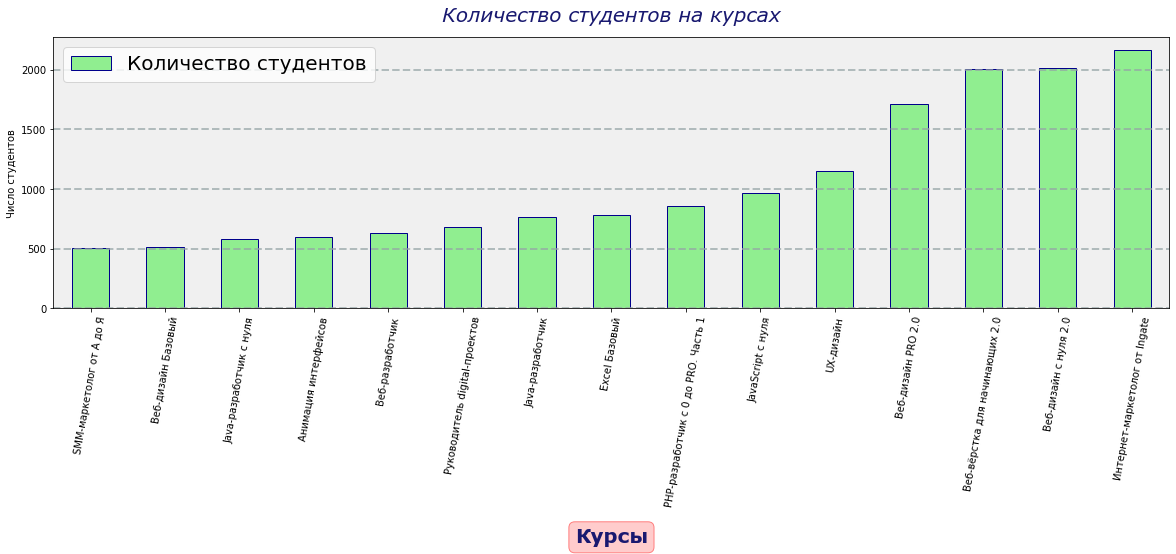

In [182]:
df_1_5.plot(kind = 'bar', rot = 80, fontsize = 10, figsize=(20,5), color = 'lightgreen', edgecolor = 'darkblue',
           linewidth = 1)
plt.legend(fontsize = 20)
plt.title('Количество студентов на курсах', pad = 15, fontsize = 20, fontstyle = 'oblique', color = 'midnightblue', fontfamily = 'Verdana')
plt.xlabel('Курсы', labelpad = 20, fontsize = 20, fontweight = 'bold', fontstyle = 'normal', color = 'midnightblue', fontfamily = 'Verdana', bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5), 
                   fc=(1., 0.8, 0.8),
                   ))
plt.ylabel('Число студентов', fontsize = 10, fontstyle = 'normal')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
ax = plt.gca()
ax.set_facecolor('0.94')
plt.show()

### (m) Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, 
#отражающий количество студентов на каждом курсе. График должен иметь заголовок. Значения должны быть отсортированы. 
#Цвет столбцов должен содержать информацию о сфере, к которой относится курс (то есть нужна легенда). 
#Прозрачность должна стоять на отметке 0.1. 
#На график должна быть нанесена линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно ⭐

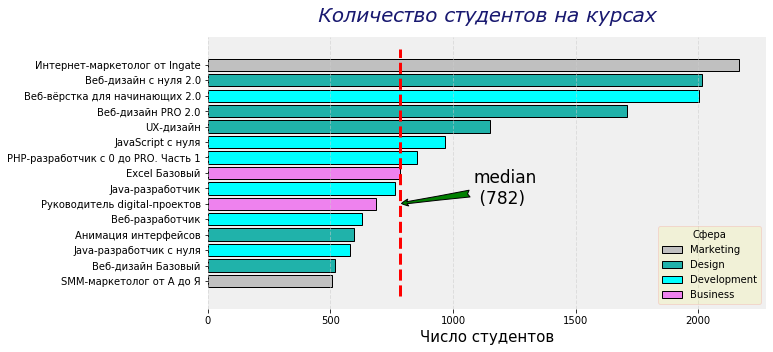

In [183]:
df_1_7 = main.groupby('course_title').agg({'student_id': 'nunique', 'course_field' : lambda x:x.iloc[0]})
df_1_7.columns = ['Количество студентов', 'Сфера']
df_1_7.index.names = ['Курс']
df_1_7.sort_values('Количество студентов', ascending = True, inplace = True)

plt.figure(figsize=(10,5))
plt.title('Количество студентов на курсах', pad = 15, fontsize = 20, 
          fontstyle = 'oblique', color = 'midnightblue', fontfamily = 'Verdana')
scope = list(set(df_1_7['Сфера'].tolist()))
colors = ['silver', 'violet', 'cyan', 'lightseagreen']
count = 0
while count < len(df_1_5.index):
    if df_1_7.iloc[count,1] == scope[0]:
        plt.barh(df_1_7.index[count], df_1_5['Количество студентов'][count].tolist(),
                 color = colors[0], alpha = 1, edgecolor = "k", linewidth = 1, label = scope[0])
    elif df_1_7.iloc[count,1] == scope[1]:
        plt.barh(df_1_7.index[count], df_1_5['Количество студентов'][count].tolist(),
                 color = colors[1], alpha = 1, edgecolor = "k", linewidth = 1, label = scope[1])
    elif df_1_7.iloc[count,1] == scope[2]:
        plt.barh(df_1_7.index[count], df_1_5['Количество студентов'][count].tolist(),
                 color = colors[2], alpha = 1, edgecolor = "k", linewidth = 1, label = scope[2])
    else:
        plt.barh(df_1_7.index[count], df_1_5['Количество студентов'][count].tolist(),
                 color = colors[3], alpha = 1, edgecolor = "k", linewidth = 1, label = scope[3])
    count +=1
    
plt.grid(color='.8', linestyle='--', linewidth = 1, alpha = .5, axis = 'x')
plt.xlabel('Число студентов', fontsize = 15, fontstyle = 'normal')

#удаление повторов в легенде
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),loc = 'lower right', title = 'Сфера', shadow = False,
          facecolor = 'yellow', edgecolor = 'r', framealpha = .1)

#удаление рамки (import seaborn as sns)
sns.despine(left=True, bottom=True, right=True)

#Медиана
plt.vlines(median(df_1_7['Количество студентов'].tolist()),
           -1, len(df_1_7.index.tolist()), color = 'r', linestyle = '--', linewidth = 3)
plt.annotate('median\n (782)', xy = (median(df_1_7['Количество студентов'].tolist()), 5),  xycoords='data',
            xytext=(max(df_1_7['Количество студентов'].tolist()) // 2, 5), textcoords='data',
            arrowprops=dict(facecolor='g', arrowstyle='fancy'), fontsize=17)

ax = plt.gca()
ax.set_facecolor('0.94')

plt.show()

#### На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать 
#все полученные выше метрики)

На основании полученных метрик стало известно, что университет обучает студентов на 15 различных курсах, относящихся к 4 условным типам отраслевой деятельности (Маркетинг, Дизайн, Разработка, Управление). Установлено количество обучающих модулей в каждом курсе (от 8 до 21) и количество уроков в каждом модуле (от 1 до 29 при среднем = 5). Установлено медианное количество студентов по всем курсам ( = 782), при общей численности начавших реальное обучение ( = 15847) и просто зарегистрированных ( = 43830). Наибольшее количество студентов ( = 2168) начало обучение на курсе по маркетингу от компании Ingate (в которой я, кстати, работал некоторое время на заре её становления). Минимальное количество студентов ( = 506) начало обучение на курсе "SMM-маркетолог от А до Я". Выявлено значительное количество некорректных записей с днями рождения студентов, что не позволяет достоверно установить минимальный и максимальный возраст студентов. Однако, определенно точно можно утверждать, что средний и медианный возраст студентов составляет 30 лет. Распределение по медианному возрасту между курсами практически одинаково. Количество курсов бизнес-направления и маркетинга является минимальным из общего числа (по 2 курса). Максимальное количество курсов принадлежит направлению по программированию\разработке (6 курсов). На втором месте по общему количеству находятся дизайнерские курсы (5 курсов).

## 2. Расчет потенциальной нагрузки на преподавателей

1. **(p)** Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.

In [184]:
# Первая Домашняя работа во всех курсах находится в 1-ом модуле, кроме курса Веб-дизайн Базовый.
# У него первая Домашняя работа находится в 3-ем модуле. В дальнейших расчетах это выявлено,
# не будем перегружать код.
df_1_8 = main[((main['module_number'] == 1) & (main['lesson_title'] == 'Домашняя работа'))
              | ((main['course_title'] == 'Веб-дизайн Базовый') & (main['module_number'] == 3)
                 & (main['lesson_title'] == 'Домашняя работа'))].copy()

df_1_8['Year'] = (pd.to_datetime(df_1_8['start_date']).dt.strftime('%Y'))
df_1_8['Month'] = (pd.to_datetime(df_1_8['start_date']).dt.strftime('%m'))

df_1_8 = df_1_8.groupby(['course_title', 'Year', 'Month']).agg({'student_id': 'count'})

course_list = list(set(df_1_8.index.get_level_values(0)))
date_list = []

#поиск встречающихся пар год-месяц
for row in df_1_8.index:
    date_list.append(str(row[1]) + str(row[2]))
date_list = sorted(set(date_list))

df_1_9 = pd.DataFrame(index = course_list, columns = date_list)

#заносим данные в новый датасет
for row in df_1_8.index:
    df_1_9.loc[row[0],str(row[1])+str(row[2])] = df_1_8.loc[row, 'student_id']
    
df_1_9 = df_1_9.fillna(0)

#добавим разделитель в дату. matplotlib не отрабатывает корректно datetime по оси X.
#df_1_9.columns = pd.to_datetime(df_1_9.columns, format="%Y%m")
sep_list = []
for row in df_1_9.columns.tolist():
    sep_list.append(str(row[:4]) + str('/') + str(row[4:]))
df_1_9.columns = sep_list

df_1_9

2016/03  2016/11  2017/03  2017/04  \
Веб-вёрстка для начинающих 2.0             0        0        0        0   
Анимация интерфейсов                       0        0        0        0   
SMM-маркетолог от А до Я                   0        0        0        0   
Веб-дизайн PRO 2.0                         0        0        0        0   
Веб-дизайн с нуля 2.0                      0        0        0        0   
Руководитель digital-проектов              0        0        0        0   
Интернет-маркетолог от Ingate              0        0        0        0   
Excel Базовый                              0        0        0        0   
Java-разработчик                           0        0        0        0   
PHP-разработчик с 0 до PRO. Часть 1        0        0        0        0   
Java-разработчик c нуля                    0        0        0        0   
UX-дизайн                                  0        2        0        1   
JavaScript с нуля                          0        0        0        0   
Веб-дизайн Базовый                         0        0        2        0   
Веб-разработчик                            1        0        0        1   

                                     2017/05  2017/06  2017/07  2018/01  \
Веб-вёрстка для начинающих 2.0             0        0        0        0   
Анимация интерфейсов                       0        0        0        0   
SMM-маркетолог от А до Я                   0        0        0        0   
Веб-дизайн PRO 2.0                         0        0        0        0   
Веб-дизайн с нуля 2.0                      0        0        0        0   
Руководитель digital-проектов              1        1        0        0   
Интернет-маркетолог от Ingate              0        0        0        1   
Excel Базовый                              0        0        0        0   
Java-разработчик                           0        0        0        1   
PHP-разработчик с 0 до PRO. Часть 1        0        0        0        0   
Java-разработчик c нуля                    0        0        0        0   
UX-дизайн                                  1        1        0        0   
JavaScript с нуля                          0        0        0        0   
Веб-дизайн Базовый                         0        0        0        0   
Веб-разработчик                            0        0        1        1   

                                     2018/02  2018/03  ...  2018/10  2018/11  \
Веб-вёрстка для начинающих 2.0             0        0  ...       78       81   
Анимация интерфейсов                      14       15  ...       27       14   
SMM-маркетолог от А до Я                   0        0  ...       27       13   
Веб-дизайн PRO 2.0                         0        0  ...       27       28   
Веб-дизайн с нуля 2.0                      0        0  ...      125      106   
Руководитель digital-проектов             64       42  ...       27       30   
Интернет-маркетолог от Ingate             76       94  ...       96       72   
Excel Базовый                              6        3  ...       30       33   
Java-разработчик                          14       26  ...       33       32   
PHP-разработчик с 0 до PRO. Часть 1        0        3  ...       31       27   
Java-разработчик c нуля                    0        0  ...        0        0   
UX-дизайн                                 61       61  ...       36       43   
JavaScript с нуля                          0        6  ...       42       36   
Веб-дизайн Базовый                        56       57  ...        4        9   
Веб-разработчик                           31       47  ...        9       15   

                                     2018/12  2019/01  2019/02  2019/03  \
Веб-вёрстка для начинающих 2.0           132      119       83      105   
Анимация интерфейсов                      22       34       17       14   
SMM-маркетолог от А до Я                  27       42       41       42   
Веб-дизайн PRO 2.0                        43       59 

### (m) На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.

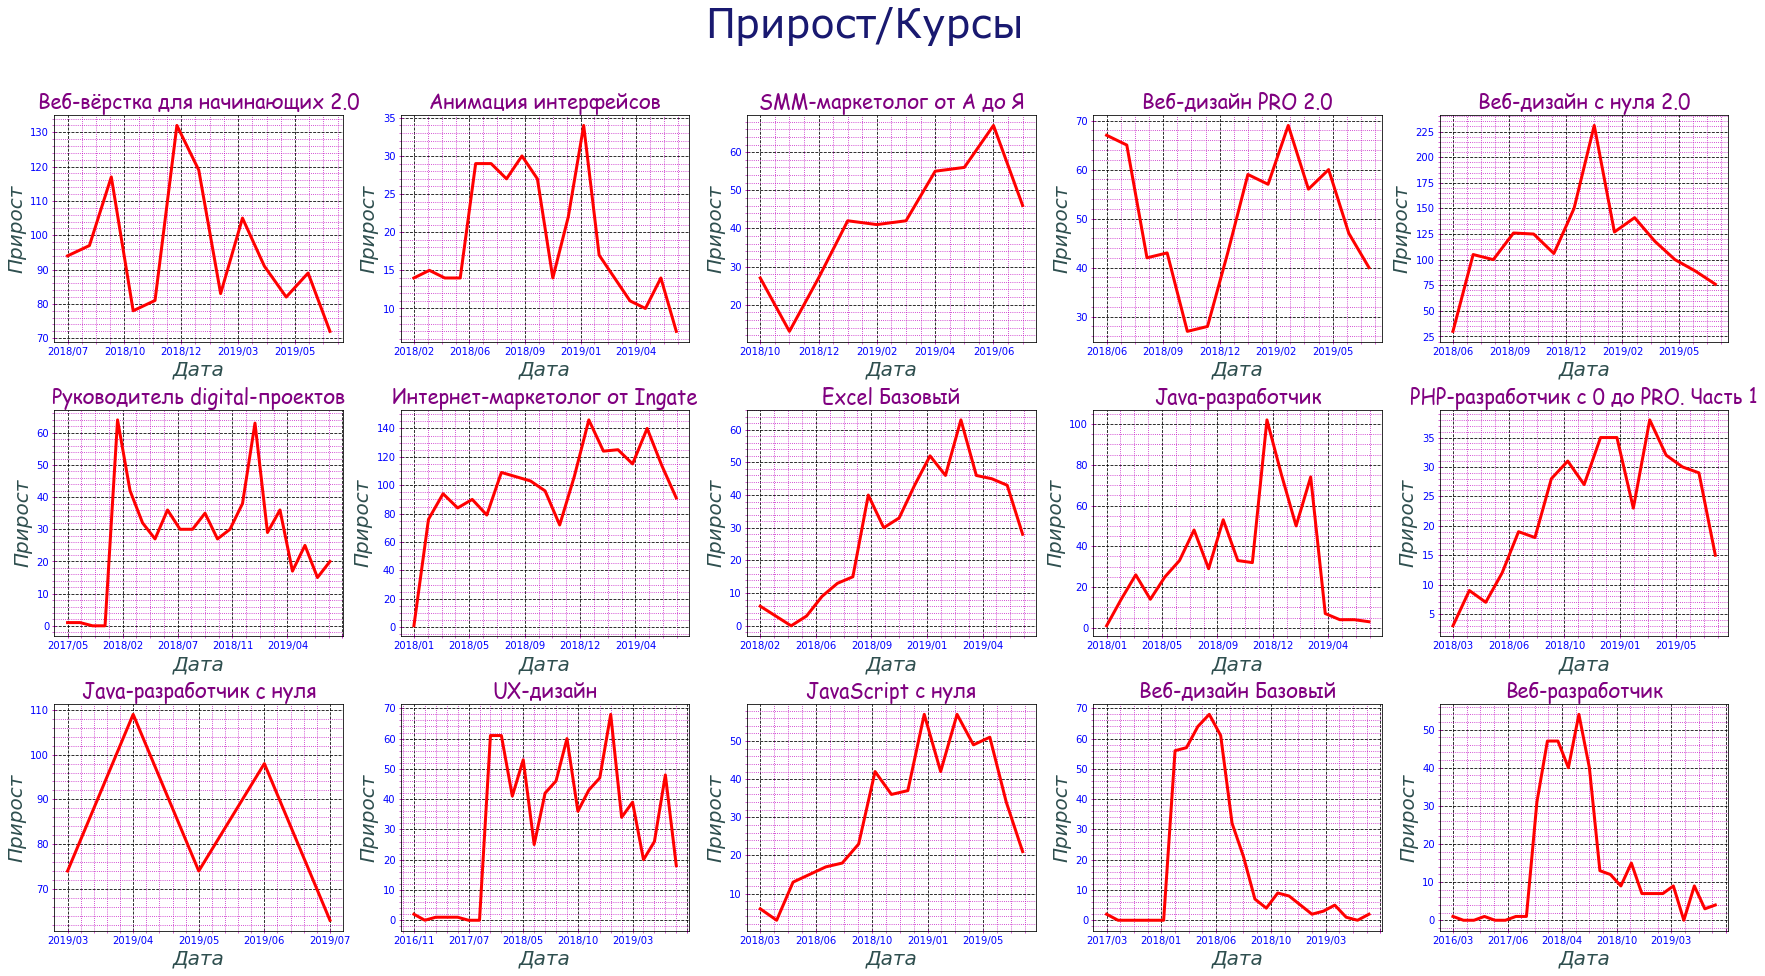

In [185]:
fig, ax = plt.subplots(3, len(set(df_1_8.index.get_level_values(0)))//3, figsize = (30, 15))
i = 0
fig.suptitle('Прирост/Курсы', fontsize=40, fontfamily = 'Verdana', fontstyle = 'normal', color = 'midnightblue')

for row in range(0, 3):
    for column in range(0, len(set(df_1_8.index.get_level_values(0)))//3):
        #уберем первые нулевые значения прироста
        y = df_1_9.iloc[column + 5*row].tolist()
        for value in range(0,len(y)):
            if y[0] == 0:
                y.pop(0)
        x = df_1_9.columns.tolist()[-len(y):]
        
        ax[row,column].plot(x, y, color = 'r', linewidth = 3)

        x_major = len(df_1_9.columns.tolist()[-len(y):]) / 5
        x_minor = x_major / 5
        ax[row, column].xaxis.set_major_locator(ticker.MultipleLocator(x_major))
        ax[row, column].xaxis.set_minor_locator(ticker.MultipleLocator(x_minor))
        ax[row, column].tick_params(axis = 'both', which = 'major', direction = 'inout', color = 'm',
               labelcolor = 'b', bottom = True, left = True, labelbottom = True, labelleft = True)
        ax[row, column].tick_params(axis = 'both', which = 'minor', direction = 'out', color = 'm',
               labelcolor = 'r', bottom = True, left = True)
        ax[row, column].set_xlabel('', fontsize = 20, color = 'darkslategrey', fontstyle = 'oblique')
        ax[row, column].set_ylabel('', fontsize = 20, color = 'darkslategrey', fontstyle = 'oblique')
        ax[row, column].grid(which='major', color = 'k', linestyle = '--')
        ax[row, column].minorticks_on()
        ax[row, column].grid(which='minor', color = 'm', linestyle = ':')
        ax[row,column].set_title(df_1_9.index[i], fontfamily = 'fantasy', fontstyle = 'italic',
                color = 'purple', fontsize = 20,pad = 0)
        i +=1

plt.setp(ax, xlabel = 'Дата', ylabel = 'Прирост')
plt.rcParams['axes.labelsize'] = 20
plt.subplots_adjust(wspace=.2, hspace=.3)
plt.show()

### (m) На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐

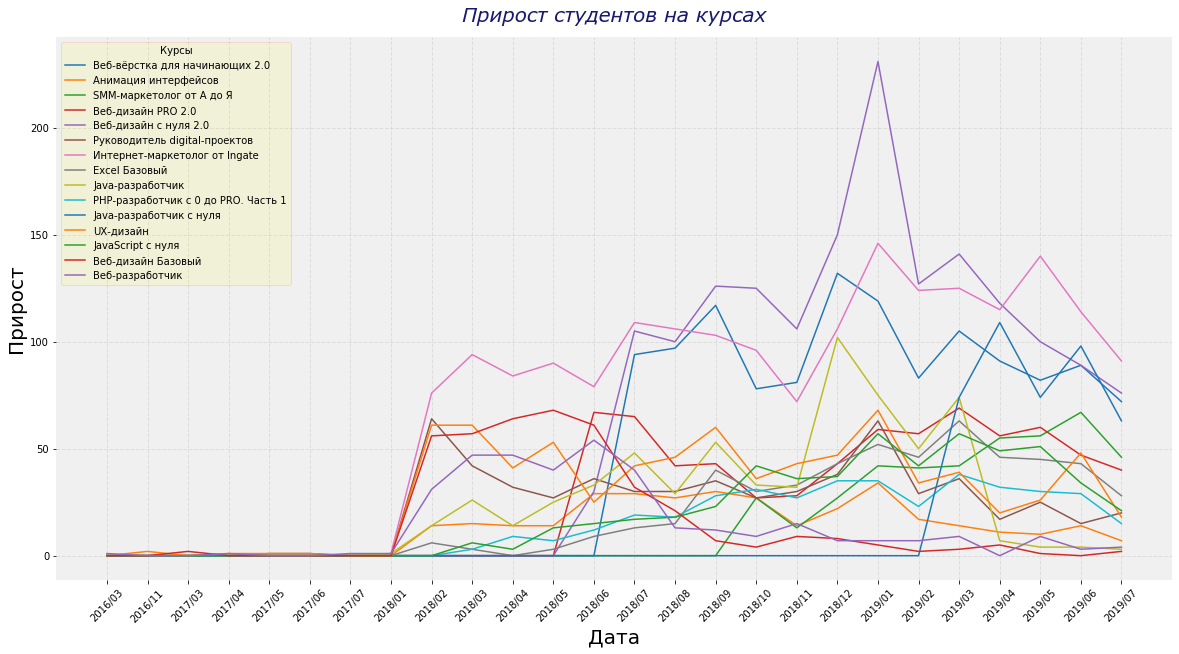

In [186]:
plt.figure(figsize=(20,10))
plt.title(r'Прирост студентов на курсах', pad = 15, fontsize = 20, fontstyle = 'oblique', color = 'midnightblue', fontfamily = 'Verdana')
plt.xlabel('Дата', fontsize = 20, fontweight = 'normal', fontstyle = 'normal')
plt.ylabel('Прирост', fontsize = 20, fontweight = 'normal', fontstyle = 'normal')

i = 0
while i < len(set(df_1_8.index.get_level_values(0))):
    plt.plot(df_1_9.columns, df_1_9.iloc[i], label = df_1_9.index[i])
    i += 1
plt.legend(loc = 'upper left', title = 'Курсы', shadow = False,
          facecolor = 'yellow', edgecolor = 'r', framealpha = .1)
plt.grid(color='.8', linestyle='--', linewidth = 1, alpha = .5, axis = 'both')
sns.despine(left=True, bottom=True, right=True) #убираем рамку у графика
ax = plt.gca()
ax.set_facecolor('0.94') #цвет фона

plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

plt.show()

### (p) Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)

In [70]:
# нагрузку на преподавателей определяют прогрессы со статусом done (проверенные и принятые) 
# и fail (проверенные и непринятые).
df_1_10 = main[(main['is_homework'] == True) & ((main['status'] == 'done') | (main['status'] == 'fail'))].copy()

df_1_10['Year_start'] = (pd.to_datetime(df_1_10['start_date']).dt.strftime('%Y'))
df_1_10['Month_start'] = (pd.to_datetime(df_1_10['start_date']).dt.strftime('%m'))
df_1_10['Year_finish'] = (pd.to_datetime(df_1_10['finish_date']).dt.strftime('%Y'))
df_1_10['Month_finish'] = (pd.to_datetime(df_1_10['finish_date']).dt.strftime('%m'))

#пары (год/месяц) прогрессов
year = 2016
month = 1
l = []
while year <= 2019:
    while 1 <= month <= 12:
        l.append(str(int(year))+str(int(month)))
        month +=1
    year +=1
    month = 1

h = []
i=0    
while i < len(l):
    row = str(l[i][:4]) + str('/') + str(l[i][4:])
    if len(l[i]) < 6:
        row = str(l[i][:4]) + str('/0') + str(l[i][4:])
    h.append(row)
    i+=1
date_list = h[2:-5]

#Готовим пустой датасет для заливки данных
course_list = set(df_1_10['course_title'].tolist()) #список курсов
df_1_13 = pd.DataFrame(index = course_list, columns = date_list)
df_1_13 = df_1_13.fillna(0)

df_1_10 = df_1_10.fillna(0)
df_1_10.sort_values('start_date', inplace = True)

#Заливаем данные
i = 0
count_fast = 1 #работы в пределах одного месяца, либо c fail-статусом
count_long = 1 #работы, переходящие в следующие месяцы
while i < len(df_1_10['progress_id'].tolist()):
    if ((df_1_10.iloc[i].Year_start == df_1_10.iloc[i].Year_finish) and (df_1_10.iloc[i].Month_start == df_1_10.iloc[i].Month_finish)) or (df_1_10.iloc[i].finish_date == 0):
        df_1_13.loc[df_1_10.iloc[i].course_title, str(df_1_10.iloc[i].Year_start) + str('/') + str(df_1_10.iloc[i].Month_start)] += count_fast
        count_fast = 1
    else:
        #количество месяцев обучения в прогрессе
        distance = (int(df_1_10.iloc[i].Year_finish) - int(df_1_10.iloc[i].Year_start))*12 +(int(df_1_10.iloc[i].Month_finish) - int(df_1_10.iloc[i].Month_start)) + 1
        #номер столбца по его названию
        columns_num = df_1_13.columns.get_loc(str(df_1_10.iloc[i].Year_start) + str('/') + str(df_1_10.iloc[i].Month_start))
        df_1_13.loc[df_1_10.iloc[i].course_title][columns_num : columns_num + distance] += count_long
        count_long = 1
    i += 1

df_1_13

2016/03  2016/04  2016/05  2016/06  \
Веб-дизайн с нуля 2.0                      0        0        0        0   
Веб-вёрстка для начинающих 2.0             0        0        0        0   
Интернет-маркетолог от Ingate              0        0        0        0   
SMM-маркетолог от А до Я                   0        0        0        0   
UX-дизайн                                  0        0        0        0   
Руководитель digital-проектов              0        0        0        0   
JavaScript с нуля                          0        0        0        0   
PHP-разработчик с 0 до PRO. Часть 1        0        0        0        0   
Анимация интерфейсов                       0        0        0        0   
Excel Базовый                              0        0        0        0   
Веб-дизайн Базовый                         0        0        0        0   
Java-разработчик                           0        0        0        0   
Java-разработчик c нуля                    0        0        0        0   
Веб-разработчик                            5        0        0        0   
Веб-дизайн PRO 2.0                         0        0        0        0   

                                     2016/07  2016/08  2016/09  2016/10  \
Веб-дизайн с нуля 2.0                      0        0        0        0   
Веб-вёрстка для начинающих 2.0             0        0        0        0   
Интернет-маркетолог от Ingate              0        0        0        0   
SMM-маркетолог от А до Я                   0        0        0        0   
UX-дизайн                                  0        0        0        0   
Руководитель digital-проектов              0        0        0        0   
JavaScript с нуля                          0        0        0        0   
PHP-разработчик с 0 до PRO. Часть 1        0        0        0        0   
Анимация интерфейсов                       0        0        0        0   
Excel Базовый                              0        0        0        0   
Веб-дизайн Базовый                         0        0        0        0   
Java-разработчик                           0        0        0        0   
Java-разработчик c нуля                    0        0        0        0   
Веб-разработчик                            0        0        0        0   
Веб-дизайн PRO 2.0                         0        0        0        0   

                                     2016/11  2016/12  ...  2018/10  2018/11  \
Веб-дизайн с нуля 2.0                      0        0  ...      943     1155   
Веб-вёрстка для начинающих 2.0             0        0  ...      417      454   
Интернет-маркетолог от Ingate              0        0  ...      604      704   
SMM-маркетолог от А до Я                   0        0  ...       34       59   
UX-дизайн                                  4        2  ...      313      308   
Руководитель digital-проектов              0        0  ...      312      271   
JavaScript с нуля                          0        0  ...      165      181   
PHP-разработчик с 0 до PRO. Часть 1        0        0  ...      127      107   
Анимация интерфейсов                       0        0  ...      169      164   
Excel Базовый                              0        0  ...      236      228   
Веб-дизайн Базовый                         0        0  ...      249      220   
Java-разработчик                           0        0  ...      248      236   
Java-разработчик c нуля                    0        0  ...        0        0   
Веб-разработчик                            0        0  ...      139      150   
Веб-дизайн PRO 2.0                         0        0  ...      284      286   

                                     2018/12  2019/01  2019/02  2019/03  \
Веб-дизайн с нуля 2.0                   1380     2161     2001     1964   
Веб-вёрстка для начинающих 2.0           536      613      543      576   
Интернет-маркетолог от Ingate            721      854      808      810   
SMM-маркетолог от А до Я                  63       88 

### (m) Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы

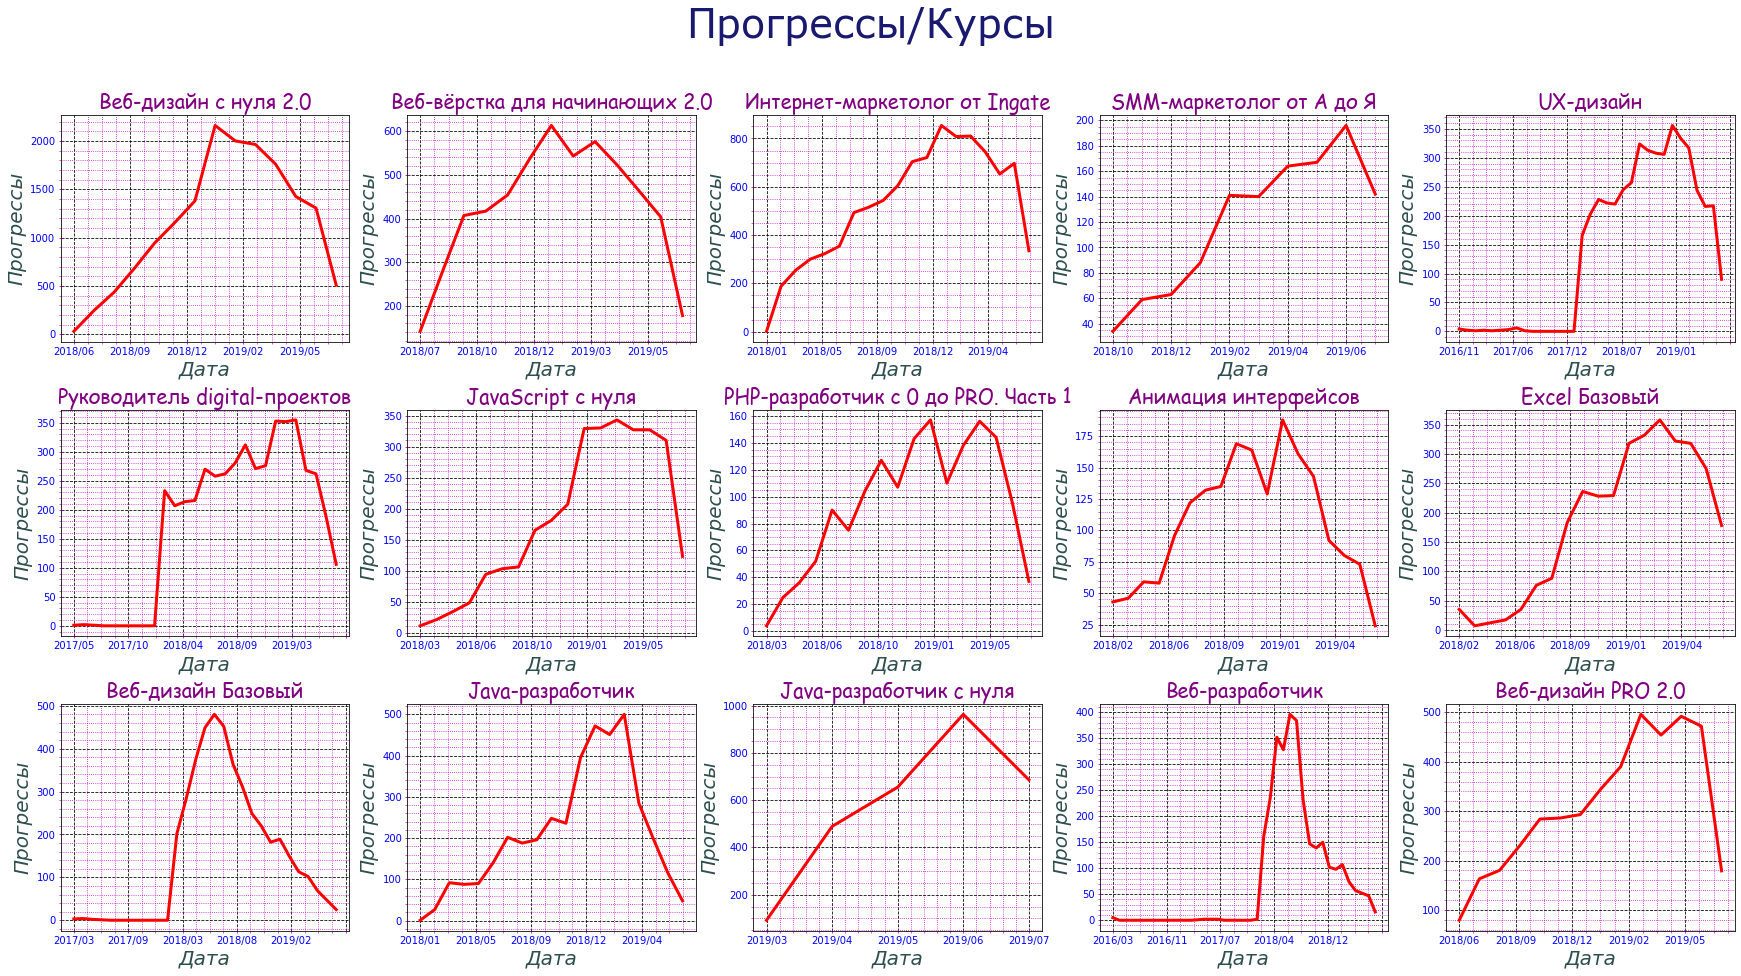

In [71]:
fig, ax = plt.subplots(3, len(set(df_1_13.index.get_level_values(0)))//3, figsize = (30, 15))
i = 0
fig.suptitle('Прогрессы/Курсы', fontsize=40, fontfamily = 'Verdana', fontstyle = 'normal', color = 'midnightblue')

for row in range(0, 3):
    for column in range(0, len(set(df_1_13.index.get_level_values(0)))//3):
        #уберем первые нулевые значения в прогрессе
        y = df_1_13.iloc[column + 5*row].tolist()
        for value in range(0,len(y)):
            if y[0] == 0:
                y.pop(0)
        x = df_1_13.columns.tolist()[-len(y):]
        
        ax[row,column].plot(x, y, color = 'r', linewidth = 3)

        x_major = len(df_1_13.columns.tolist()[-len(y):]) / 5
        x_minor = x_major / 5
        ax[row, column].xaxis.set_major_locator(ticker.MultipleLocator(x_major))
        ax[row, column].xaxis.set_minor_locator(ticker.MultipleLocator(x_minor))
        ax[row, column].tick_params(axis = 'both', which = 'major', direction = 'inout', color = 'm',
               labelcolor = 'b', bottom = True, left = True, labelbottom = True, labelleft = True)
        ax[row, column].tick_params(axis = 'both', which = 'minor', direction = 'out', color = 'm',
               labelcolor = 'r', bottom = True, left = True)
        ax[row, column].set_xlabel('', fontsize = 20, color = 'darkslategrey', fontstyle = 'oblique')
        ax[row, column].set_ylabel('', fontsize = 20, color = 'darkslategrey', fontstyle = 'oblique')
        ax[row, column].grid(which='major', color = 'k', linestyle = '--')
        ax[row, column].minorticks_on()
        ax[row, column].grid(which='minor', color = 'm', linestyle = ':')
        ax[row,column].set_title(df_1_13.index[i], fontfamily = 'fantasy', fontstyle = 'italic',
                color = 'purple', fontsize = 20,pad = 0)
        i +=1

plt.setp(ax, xlabel = 'Дата', ylabel = 'Прогрессы')
plt.rcParams['axes.labelsize'] = 20
plt.subplots_adjust(wspace=.2, hspace=.3)
plt.show()

### (m) Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐

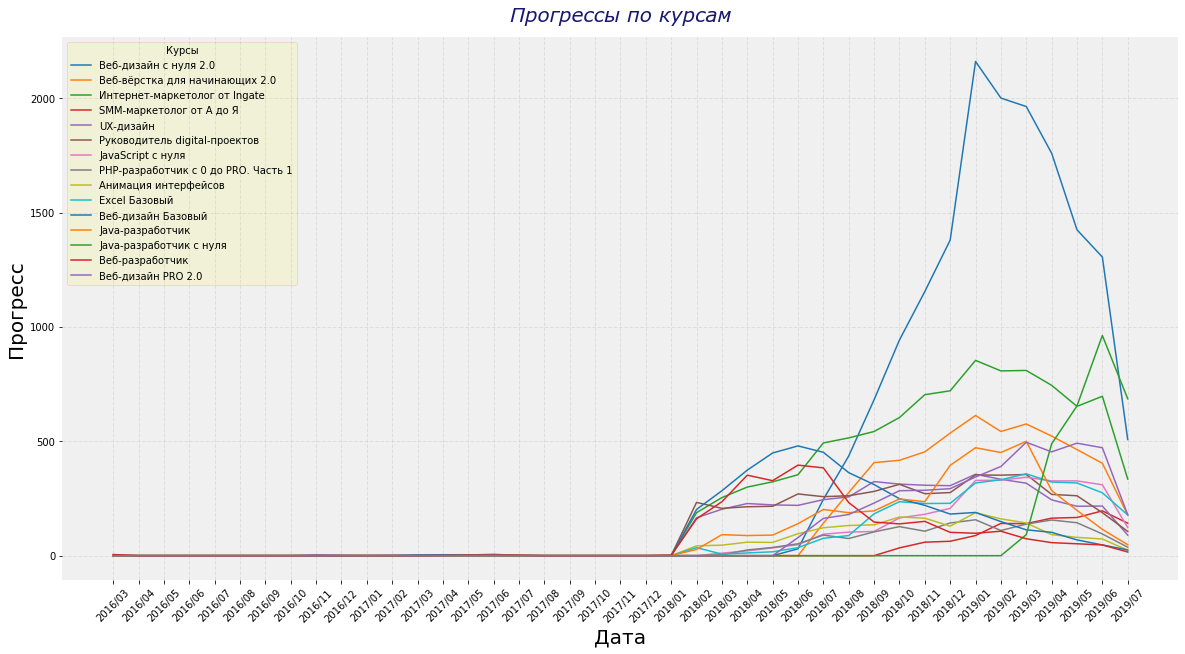

In [72]:
plt.figure(figsize=(20,10))
plt.title(r'Прогрессы по курсам', pad = 15, fontsize = 20, fontstyle = 'oblique', color = 'midnightblue', fontfamily = 'Verdana')
plt.xlabel('Дата', fontsize = 20, fontweight = 'normal', fontstyle = 'normal')
plt.ylabel('Прогресс', fontsize = 20, fontweight = 'normal', fontstyle = 'normal')

i = 0
while i < len(set(df_1_13.index.get_level_values(0))):
    plt.plot(df_1_13.columns, df_1_13.iloc[i], label = df_1_13.index[i])
    i += 1
plt.legend(loc = 'upper left', title = 'Курсы', shadow = False,
          facecolor = 'yellow', edgecolor = 'r', framealpha = .1)
plt.grid(color='.8', linestyle='--', linewidth = 1, alpha = .5, axis = 'both')
sns.despine(left=True, bottom=True, right=True) #убираем рамку у графика
ax = plt.gca()
ax.set_facecolor('0.94') #цвет фона

plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

plt.show()

Полученные во 2 разделе метрики говорят о том, что фактически университет начал функционировать (набирать студентов) с начала 2018 года. Курсы "Веб-дизайн базовый" и "Веб-разработчик" в первый год характеризовались как резким набором студентов, так и последующим интенсивным спадом обучающихся к концу 2018 года. Курс "Java-разработчик с нуля" самый молодой и характерен паттерном "Двойная вершина". Его открытие привело/совпало с заметным уменьшением студентов на курсах "JavaScript с нуля" и "Java-разработчик". Курсы "Веб-дизайн Базовый" и "Веб-дизайн PRO 2.0" к концу 2018 года существенно утратили наполненность обучающимися, что дало в свою очередь рекордный прирост студентов на курс "Веб-дизайн с нуля 2.0". При этом курс "Веб-дизайн PRO 2.0" в дальнейшем восстановил свою численность, чего нельзя сказать о курсе "Веб-дизайн Базовый". Курсы по маркетингу (2 шт.) характеризуются как уверенным притоком новых студентов, так и поддержанием его на достаточно стабильном уровне. У большинства курсов заметен новогодний пик учащихся на стыке 2018 и 2019 годов, в частности курс "Веб-дизайн с нуля 2.0" показал максимальный прирост студентов в новогодний период. Наполненность курсов бизнес-направления достаточно стабильна с локальными перепадами. Наиболее интенсивная нагрузка на преподавательский состав выявлена в начале 2019 года. В конце рассматриваемого диапазона дат тренды по всем курсам имеют устойчивый нисходящий "медвежий" характер, что может быть связано как с объективным оттоком студентов, так и недостаточным количеством данных для анализа. Необходимость расширения штата преподавателей не выявлена.

## 3. Выявление проблемных модулей

1. **(p)** Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле

In [190]:
df_1_14 = main[main['lesson_title'] == 'Домашняя работа'].copy()
df_1_14 = df_1_14.groupby(['course_title', 'module_number', 'progress_id']).agg({'start_date' : lambda x: min(x),
                                                                                 'finish_date' : lambda x: max(x)})
#удалим прогрессы с незавершенным ДЗ
df_1_14 = df_1_14.dropna(axis='index', how = 'any', subset=['finish_date'])

df_1_14['distance'] = (df_1_14['finish_date'] - df_1_14['start_date']).dt.days

#удаление некорректных distance. start_date больше finish_date
df_1_14 = df_1_14.loc[df_1_14['distance'] >= 0]
#df_1_14.loc[df_1_14['distance'] < 0, 'distance'] = 0

df_1_14 = df_1_14.groupby(['course_title', 'module_number']).agg(['min', 'max', 'mean', 'median'])

df_1_14

distance                       
                                                 min  max       mean median
course_title                  module_number                                
Excel Базовый                 1                    0  183   5.515419    2.0
                              2                    0  184   3.805970    1.0
                              3                    0   89   2.890339    1.0
                              4                    0  327  10.515050    3.0
                              5                    0  175   6.921053    3.0
...                                              ...  ...        ...    ...
Руководитель digital-проектов 12                   0  211  22.518519    7.0
                              13                   0  246  28.403226   13.0
                              14                   0  199  15.807018    8.0
                              15                   0  132   6.842105    2.0
                              16                   0  355  20.039216    7.0

[175 rows x 4 columns]

### (m) На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки

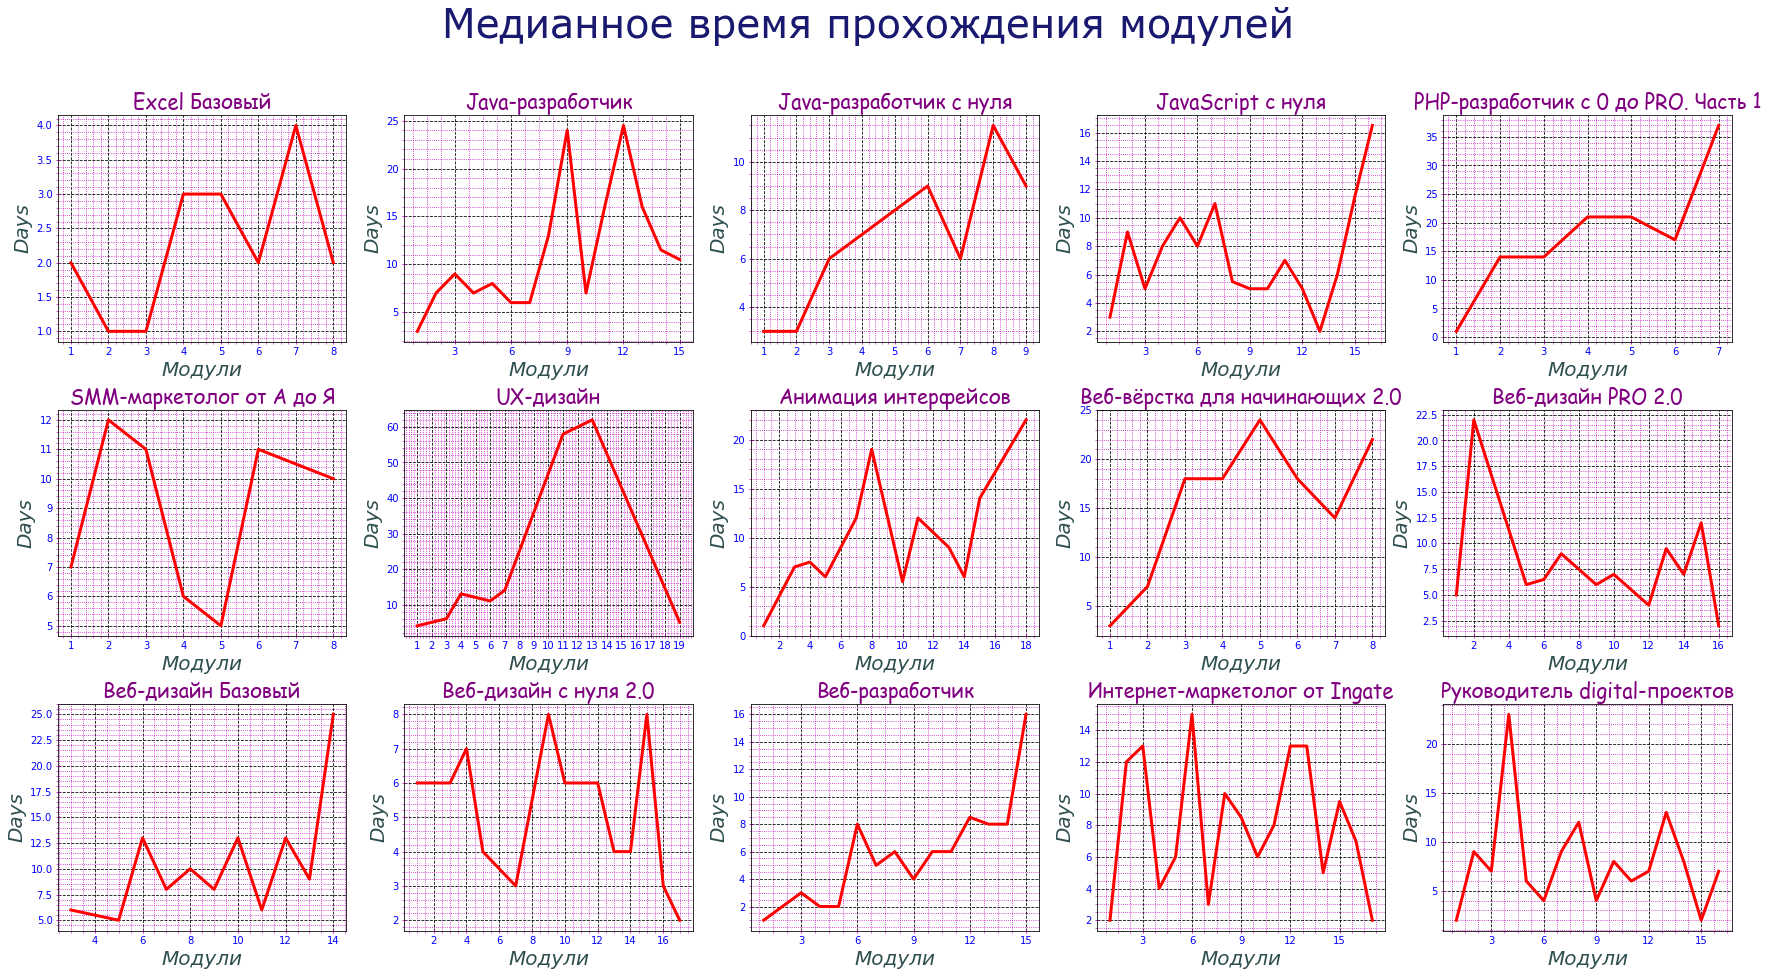

In [191]:
fig, ax = plt.subplots(3, len(set(df_1_14.index.get_level_values(0)))//3, figsize = (30, 15))
i = 0
fig.suptitle('Медианное время прохождения модулей', fontsize=40, fontfamily = 'Verdana', fontstyle = 'normal', color = 'midnightblue')

#Перечень номеров модулей по оси X для всех курсов
list_modules_per_course=[]
list_modules_per_all_course = []
for courses in sorted(list(set(df_1_14.index.get_level_values(0).tolist()))):
    for row in df_1_14.index:
        if row[0] == courses:
            list_modules_per_course.append(row[1])
    list_modules_per_all_course.append(list_modules_per_course)
    list_modules_per_course=[]

range_df_y = 0

for row in range(0, 3):
    for column in range(0, len(set(df_1_14.index.get_level_values(0)))//3):

        y = df_1_14.iloc[range_df_y:(range_df_y + len(list_modules_per_all_course[i]))][('distance', 'median')].tolist()
        x = list_modules_per_all_course[i]
        ax[row,column].plot(x, y, color = 'r', linewidth = 3)
        x_major = len(x) // 5
        x_minor = x_major / 5
        ax[row, column].xaxis.set_major_locator(ticker.MultipleLocator(x_major))
        ax[row, column].xaxis.set_minor_locator(ticker.MultipleLocator(x_minor))
        ax[row, column].tick_params(axis = 'both', which = 'major', direction = 'inout', color = 'm',
               labelcolor = 'b', bottom = True, left = True, labelbottom = True, labelleft = True)
        ax[row, column].tick_params(axis = 'both', which = 'minor', direction = 'out', color = 'm',
               labelcolor = 'r', bottom = True, left = True)
        ax[row, column].set_xlabel('', fontsize = 20, color = 'darkslategrey', fontstyle = 'oblique')
        ax[row, column].set_ylabel('', fontsize = 20, color = 'darkslategrey', fontstyle = 'oblique')
        ax[row, column].grid(which='major', color = 'k', linestyle = '--')
        ax[row, column].minorticks_on()
        ax[row, column].grid(which='minor', color = 'm', linestyle = ':')
        
        ax[row,column].set_title(df_1_14.index.get_level_values(0).unique()[i], fontfamily = 'fantasy', fontstyle = 'italic',
                color = 'purple', fontsize = 20,pad = 0)
                                         
        range_df_y += len(list_modules_per_all_course[i])
        i +=1

plt.setp(ax, xlabel = 'Модули', ylabel = 'Days')
plt.rcParams['axes.labelsize'] = 20
plt.subplots_adjust(wspace=.2, hspace=.3)
plt.show()

### (p) Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса.

In [192]:
df_1_15 = main[main['lesson_title'] == 'Домашняя работа'].copy()

#очистка
df_1_15 = df_1_15.dropna(axis='index', how = 'any', subset=['finish_date'])
df_1_15['day_distance'] = (df_1_15['finish_date'] - df_1_15['start_date']).dt.days
df_1_15 = df_1_15.loc[df_1_15['day_distance'] >= 0]
#df_1_15.loc[df_1_15['day_distance'] < 0, 'day_distance'] = 0

df_1_15['Month_start'] = (pd.to_datetime(df_1_15['start_date']).dt.strftime('%m'))
df_1_15.sort_values('start_date', inplace = True)
df_1_15 = df_1_15.groupby(['course_title', 'Month_start']).agg({'day_distance': 'median'})

month_list = []
for i in range(1,13):
    if len(str(i)) < 2:
        month_list.append(str(0)+str(i))
    else:
        month_list.append(str(i))

course_list = set(df_1_15.index.get_level_values(0)) #список курсов
df_1_16 = pd.DataFrame(index = course_list, columns = month_list)
df_1_16 = df_1_16.fillna(0)

i = 0
while i < len(df_1_15.index.get_level_values(0)):
    df_1_16.loc[df_1_15.index.get_level_values(0)[i],
                str(df_1_15.index.get_level_values(1)[i])] = df_1_15.iloc[i].tolist()[0]
    i += 1
    
df_1_16.columns = ['январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь',
          'октябрь', 'ноябрь', 'декабрь']
df_1_16

январь  февраль  март  апрель   май  \
Веб-вёрстка для начинающих 2.0          9.0      8.5   8.0     9.0   8.0   
Анимация интерфейсов                    6.0      2.0   7.0     5.0   6.0   
SMM-маркетолог от А до Я               12.0     11.0  11.0     8.0  10.0   
Веб-дизайн PRO 2.0                     10.5      9.0   7.0     7.0   5.0   
Веб-дизайн с нуля 2.0                   5.0      6.0   4.0     4.0   4.0   
Руководитель digital-проектов           5.0      2.0   6.0     6.0   6.0   
Интернет-маркетолог от Ingate           6.0      4.0   6.0     7.0   7.0   
Excel Базовый                           2.0      2.0   2.0     1.0   2.0   
Java-разработчик                        5.0      4.0   7.0     9.0   8.5   
PHP-разработчик с 0 до PRO. Часть 1    11.0      7.5   9.5    10.0   9.5   
Java-разработчик c нуля                 0.0      0.0   6.0     3.0   4.0   
UX-дизайн                               9.0      4.0   9.0     8.0   7.0   
JavaScript с нуля                       6.0      5.0   5.0     4.0   5.0   
Веб-дизайн Базовый                      8.0      0.0  11.0     9.0   7.0   
Веб-разработчик                         6.0      3.0  14.0     3.0   2.0   

                                     июнь  июль  август  сентябрь  октябрь  \
Веб-вёрстка для начинающих 2.0        5.0   3.0     7.0      10.0     11.0   
Анимация интерфейсов                  4.0   5.0     3.0       7.0      4.5   
SMM-маркетолог от А до Я              7.0   4.0     0.0       0.0     17.5   
Веб-дизайн PRO 2.0                    5.0   7.0    18.5      26.0     18.0   
Веб-дизайн с нуля 2.0                 3.0   3.0     7.0       8.0      7.0   
Руководитель digital-проектов         6.0   6.0    15.0      14.0      5.0   
Интернет-маркетолог от Ingate         5.5   5.0     7.0       5.0      7.0   
Excel Базовый                         2.0   1.0     3.0       1.0      2.0   
Java-разработчик                      7.0   7.0    14.0      10.5     12.0   
PHP-разработчик с 0 до PRO. Часть 1   8.0   5.5    12.5       9.5     23.0   
Java-разработчик c нуля               3.0   2.0     0.0       0.0      0.0   
UX-дизайн                             6.0   6.0     9.0      11.0     12.0   
JavaScript с нуля                     5.0   7.0     7.0      11.0     12.0   
Веб-дизайн Базовый                    7.0   8.0    12.0      13.0     27.0   
Веб-разработчик                       1.0   2.0     4.0       7.0      9.0   

                                     ноябрь  декабрь  
Веб-вёрстка для начинающих 2.0         10.0      8.0  
Анимация интерфейсов                    8.0     11.0  
SMM-маркетолог от А до Я               17.0     24.0  
Веб-дизайн PRO 2.0                     10.0     15.0  
Веб-дизайн с нуля 2.0                   7.0      7.0  
Руководитель digital-проектов           5.5      9.0  
Интернет-маркетолог от Ingate           7.5      6.0  
Excel Базовый                           2.0      4.0  
Java-разработчик                        8.0      3.0  
PHP-разработчик с 0 до PRO. Часть 1    19.0      8.0  
Java-разработчик c нуля                 0.0      0.0  
UX-дизайн                               9.0      9.0  
JavaScript с нуля                       8.5      8.0  
Веб-дизайн Базовый                     10.5     15.0  
Веб-разработчик                         7.0      8.0

### (m) На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐

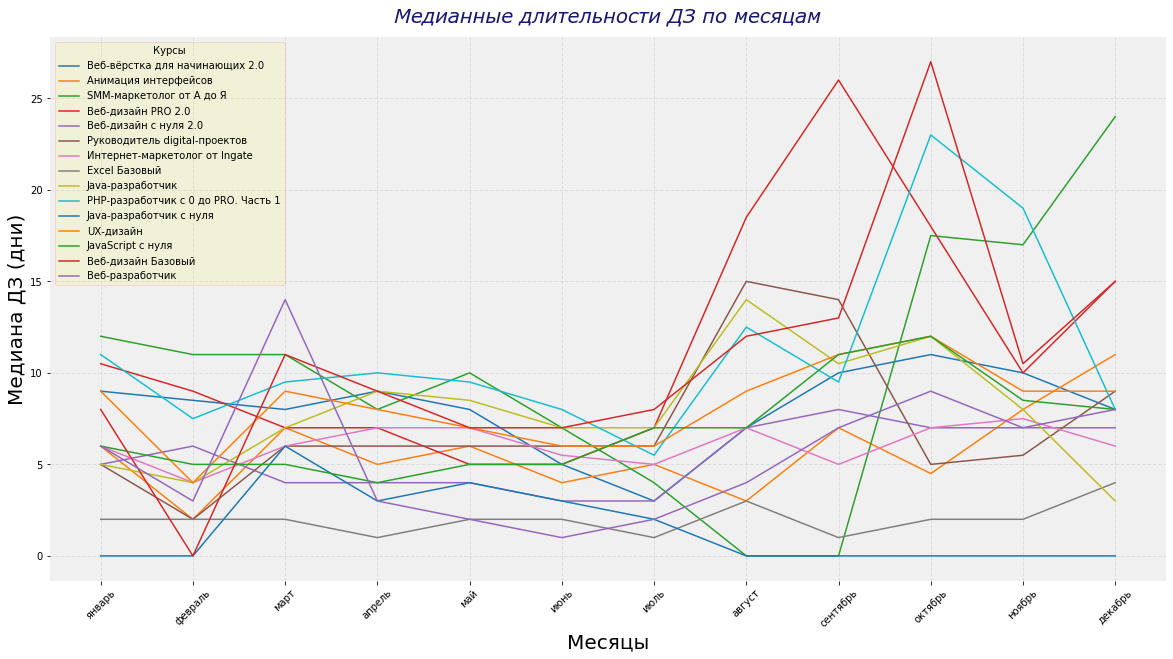

In [193]:
plt.figure(figsize=(20,10))
plt.title(r'Медианные длительности ДЗ по месяцам', pad = 15, fontsize = 20, fontstyle = 'oblique', color = 'midnightblue', fontfamily = 'Verdana')
plt.xlabel('Месяцы', fontsize = 20, fontweight = 'normal', fontstyle = 'normal')
plt.ylabel('Медиана ДЗ (дни)', fontsize = 20, fontweight = 'normal', fontstyle = 'normal')

i = 0
while i < len(set(df_1_16.index.get_level_values(0))):
    plt.plot(df_1_16.columns, df_1_16.iloc[i], label = df_1_16.index[i])
    i += 1
plt.legend(loc = 'upper left', title = 'Курсы', shadow = False,
          facecolor = 'yellow', edgecolor = 'r', framealpha = .1)
plt.grid(color='.8', linestyle='--', linewidth = 1, alpha = .5, axis = 'both')
sns.despine(left=True, bottom=True, right=True) #убираем рамку у графика
ax = plt.gca()
ax.set_facecolor('0.94') #цвет фона

plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

plt.show()

### На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

Выводы по метрикам 3-го раздела. Проблемными модулями можно считать следующие из списка: 3 - Excel базовый; 9,12 - Java разработчик; 8 - Java разработчик с нуля; 2,3,6 - SMM маркетолог от А до Я; c 8 по 16 - UX дизайн; 8 - Анимация интерфейсов; 5 - Веб-верстка для начинающих 2.0; 2 - Веб-дизайн PRO 2.0; 9,15 - Веб-дизайн с нуля 2.0; 3,6,12 - Интернет маркетолог от Ingate; 4 - Руководитель digital-проектов. Все они характеризуются пиковыми значениями медианного времени выполнения, либо чрезмерными сроками выполнения. Метрики сезонности имеют ожидаемый максимум в начале учебного года (сентябрь, октябрь),  а также небольшой локальный пик в марте.

## 4. Расчет конверсии

1. **(p)** Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).

In [12]:
df_1_17 = main[main['is_homework'] == True].copy()

#поиск уроков со множественными ДЗ (> 1)
res = pd.DataFrame()
multi_dz = df_1_17.groupby(['course_title', 'module_number']).agg({'lesson_number': 'nunique'})
multi_dz = multi_dz[(multi_dz['lesson_number'] != 1)]
list_courses_multi = list(set(multi_dz.index.get_level_values(0)))
list_modules_multi = list(multi_dz.index.get_level_values(1))
for courses in list_courses_multi:
    for modules in list_modules_multi:
        list_lesson = sorted(set(df_1_17[(df_1_17['course_title'] == courses) & (df_1_17['module_number'] == modules)]['lesson_number'].tolist()))
        for lesson in list_lesson:
            if list_lesson.index(lesson) == 0:
                continue
            elif list_lesson.index(lesson) == len(list_lesson)-1:
                continue
            else:
                res = pd.concat([res,df_1_17[(df_1_17['course_title'] == courses) & (df_1_17['module_number'] == modules) & (df_1_17['lesson_number'] == lesson)]])
df_1_17 = df_1_17.loc[~df_1_17.index.isin(res.index.tolist())]

#Списки номеров модулей с ДЗ по всем курсам
df_1_18 = df_1_17.groupby(['course_title', 'module_number']).agg('min')
list_modules_per_course=[]
list_modules_per_all_course = []
for courses in sorted(list(set(df_1_17['course_title'].tolist()))):
    for row in df_1_18.index:
        if row[0] == courses:
            list_modules_per_course.append(row[1])
    list_modules_per_all_course.append(list_modules_per_course)
    list_modules_per_course=[]

#расчет конверсии 
start_list = []
finish_list = []
conversion_list = []
conversion_all_list = []
count = 0
for courses in sorted(list(set(df_1_17['course_title'].tolist()))):
    for modules in list_modules_per_all_course[count]:
        tmp = df_1_17[(df_1_17['course_title'] == courses) & (df_1_17['module_number'] == modules)]
        tmp = tmp.groupby(['lesson_number',
                           'student_id']).agg({'start_date':lambda x:min(x),
                                               'finish_date':lambda x:max(x)})
        start_list.append(tmp[tmp.start_date.notnull()]['start_date'].count())
        finish_list.append(tmp[tmp.finish_date.notnull()]['finish_date'].count())
    i = 0
    while i < len(start_list)-1:
        if finish_list[i] != 0:
            conversion_list.append(round(start_list[i+1] / finish_list[i],2))
        else:
            conversion_list.append(.001) #странный модуль №12 в Анимации интерфейсов. Его никто не закончил. /0 (!)
    #слабо понимаю, как студенты продолжили обучение и сдачу ДЗ на следующих модулях, если не сдали ДЗ на этом...
    #зададим перенебрежимо малую конверсию на нём
    #main[(main['course_title']=='Анимация интерфейсов') & (main['module_number']==12) & (main['is_homework']==True)]
        
        i += 1
    conversion_list.insert(0,1) #будем считать, что стартовая конверсия == 1
    conversion_all_list.append(conversion_list)
    conversion_list = []
    start_list = []
    finish_list = []
    count += 1

#пишем полученные данные в датасет
data = pd.DataFrame(index = sorted(list(set(df_1_17['course_title'].tolist()))), columns = range(1,22))
data = data.fillna(0)
j = 0
while j < len(set(df_1_17['course_title'].tolist())):
    i = 0
    for row in list_modules_per_all_course[j]:
        data.loc[sorted(list(set(df_1_17['course_title'].tolist())))[j],list_modules_per_all_course[j][i]] = conversion_all_list[j][i]
        i += 1
    j += 1
data

1     2     3     4     5     6     7   \
Excel Базовый                         1  0.95  0.98  0.89  0.98  0.97  0.98   
Java-разработчик                      1  0.93  0.88  0.96  0.93  1.01  0.99   
Java-разработчик c нуля               1  0.99  0.95  1.85  0.73  0.78  0.88   
JavaScript с нуля                     1  0.95  0.98  0.99  1.04  0.99  1.00   
PHP-разработчик с 0 до PRO. Часть 1   1  0.86  1.31  1.02  1.14  1.06  0.98   
SMM-маркетолог от А до Я              1  0.82  0.95  0.56  1.22  5.06  0.00   
UX-дизайн                             1  0.97  0.99  1.00  0.00  0.96  0.99   
Анимация интерфейсов                  1  0.98  0.99  1.05  0.93  0.00  0.95   
Веб-вёрстка для начинающих 2.0        1  0.92  0.99  1.02  1.03  1.08  1.05   
Веб-дизайн PRO 2.0                    1  0.95  0.00  1.92  0.48  0.98  1.02   
Веб-дизайн Базовый                    0  0.00  1.00  0.00  0.95  0.99  0.99   
Веб-дизайн с нуля 2.0                 1  0.00  1.00  0.99  0.98  0.00  0.98   
Веб-разработчик                       1  0.98  0.99  0.92  1.16  0.92  1.02   
Интернет-маркетолог от Ingate         1  0.91  0.91  1.07  0.95  0.93  1.15   
Руководитель digital-проектов         1  0.96  1.07  0.97  1.05  1.00  0.98   

                                       8     9     10  ...    12     13    14  \
Excel Базовый                        1.01  1.03  0.00  ...  0.00  0.000  0.00   
Java-разработчик                     0.96  1.06  1.01  ...  1.02  1.060  0.96   
Java-разработчик c нуля              0.63  0.49  0.00  ...  0.00  0.000  0.00   
JavaScript с нуля                    0.98  0.99  1.01  ...  0.97  1.030  1.00   
PHP-разработчик с 0 до PRO. Часть 1  1.19  0.00  0.00  ...  0.00  0.000  0.00   
SMM-маркетолог от А до Я             0.97  0.00  0.00  ...  0.00  0.000  0.00   
UX-дизайн                            0.00  1.25  0.00  ...  0.00  1.070  0.00   
Анимация интерфейсов                 0.99  0.00  1.00  ...  0.09  0.001  1.04   
Веб-вёрстка для начинающих 2.0       1.07  0.00  0.00  ...  0.00  0.000  0.00   
Веб-дизайн PRO 2.0                   0.00  0.96  1.01  ...  1.03  0.930  1.05   
Веб-дизайн Базовый                   1.00  0.99  1.00  ...  1.02  1.010  1.03   
Веб-дизайн с нуля 2.0                0.00  0.99  0.99  ...  1.00  0.990  0.99   
Веб-разработчик                      0.98  1.06  1.02  ...  1.13  1.150  1.10   
Интернет-маркетолог от Ingate        0.98  1.00  0.99  ...  0.99  1.000  1.11   
Руководитель digital-проектов        1.03  1.01  0.97  ...  0.97  0.990  1.03   

                                       15    16    17    18    19    20    21  
Excel Базовый                        0.00  0.00  0.00  0.00  0.00  0.00  0.00  
Java-разработчик                     1.04  0.00  1.11  0.00  0.00  0.00  0.00  
Java-разработчик c нуля              0.00  0.00  0.00  0.00  0.00  0.00  0.00  
JavaScript с нуля                    1.00  1.08  0.00  1.17  0.00  0.00  0.00  
PHP-разработчик с 0 до PRO. Часть 1  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
SMM-маркетолог от А до Я             0.00  0.00  0.00  0.00  0.00  0.00  0.00  
UX-дизайн                            0.00  0.00  0.00  0.00  1.15  1.11  0.00  
Анимация интерфейсов                 1.00  0.00  0.00  1.21  0.00  0.00  0.94  
Веб-вёрстка для начинающих 2.0       0.00  0.00  0.00  0.00  0.00  0.00  0.00  
Веб-дизайн PRO 2.0                   1.05  1.04  0.00  0.00  0.00  0.00  0.00  
Веб-дизайн Базовый                   0.00  0.00  1.10  0.00  0.00  0.00  0.00  
Веб-дизайн с нуля 2.0                1.00  1.01  1.00  1.00  1.03  0.00  0.00  
Веб-разработчик                      1.15  0.00  0.00  1.30  0.00  0.00  0.00  
Интернет-маркетолог от Ingate        0.97  1.01  0.99  0.46  0.00  0.00  0.00  
Руководитель digital-проектов        1.03  1.00  0.00  0.00  0.00  0.00  0.00  

[15 rows x 21 columns]

### (m) Постройте bar-chart, отражающий конверсию перехода студентов из одного 
### модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы

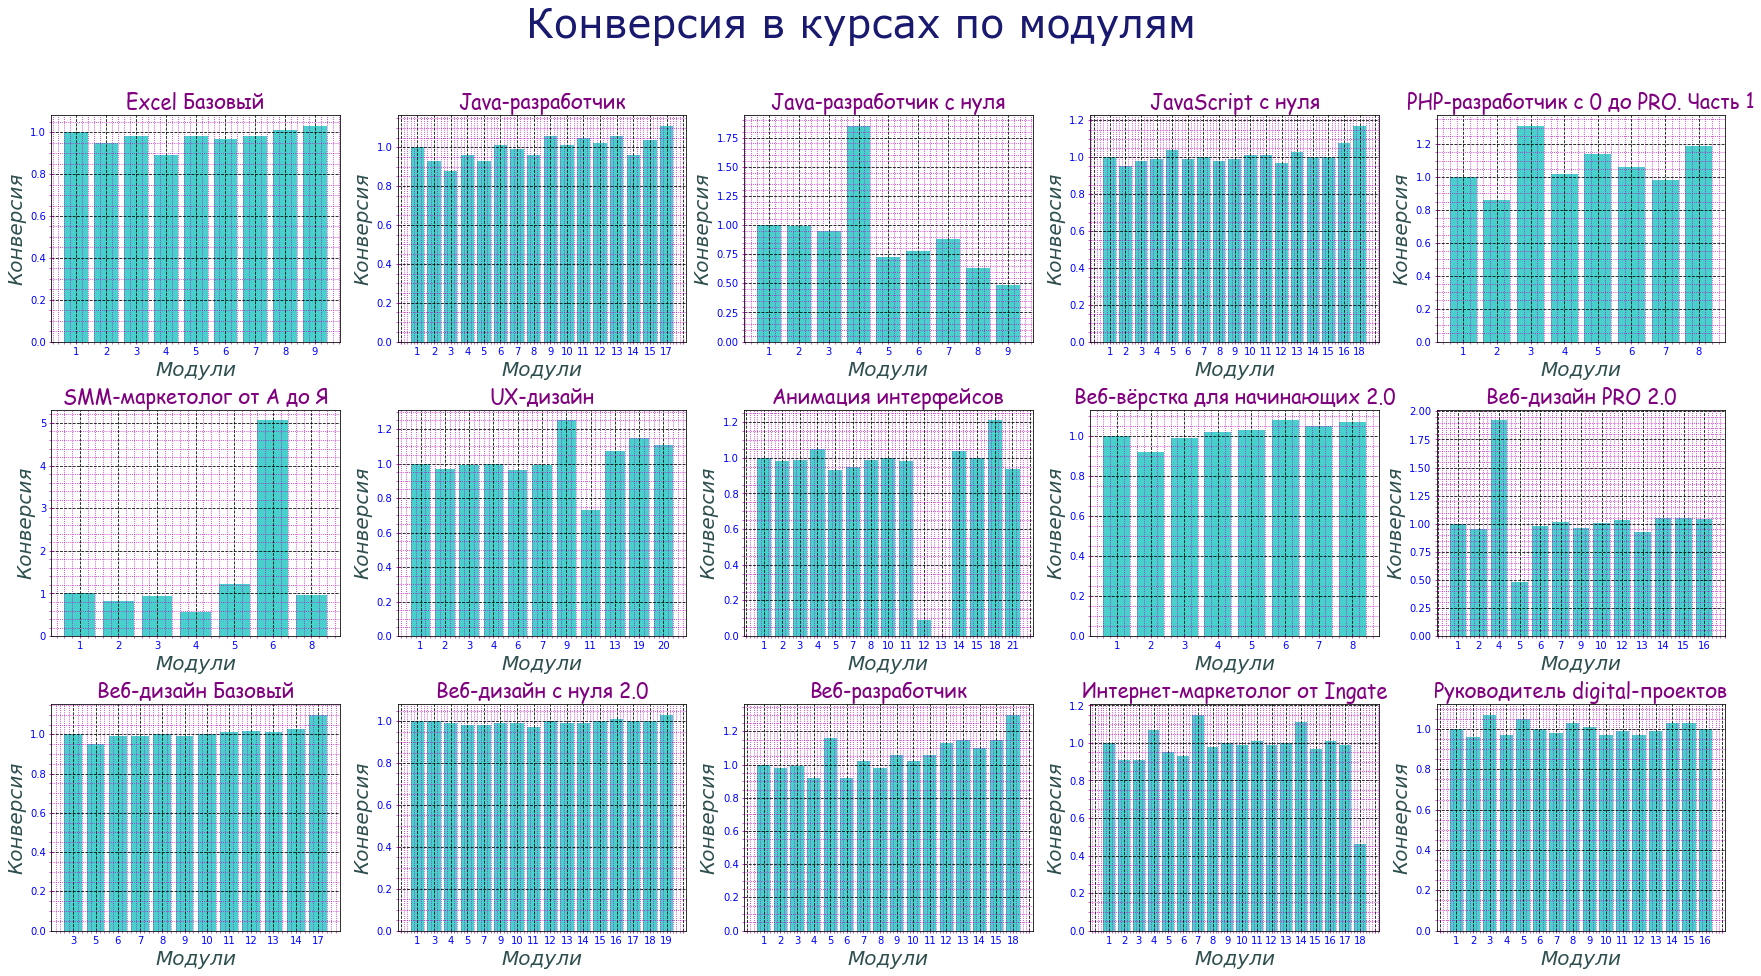

In [13]:
fig, ax = plt.subplots(3, len(list(set(df_1_17['course_title'].tolist())))//3, figsize = (30, 15))
i = 0
fig.suptitle('Конверсия в курсах по модулям', fontsize=40, fontfamily = 'Verdana', fontstyle = 'normal', color = 'midnightblue')

for row in range(0, 3):
    for column in range(0, len(list(set(df_1_17['course_title'].tolist())))//3):
        #уберем нулевые значения конверсии
        y = list(filter(lambda num: num != 0, data.iloc[i].tolist()))
        x = [str(item) for item in list_modules_per_all_course[i]]
        
#        ax[row,column].plot(x, y, color = 'r', linewidth = 3)
        ax[row,column].bar(x, y, color = 'mediumturquoise', linewidth = 3)
        x_major = 1
        x_minor = x_major / 5
        ax[row, column].xaxis.set_major_locator(ticker.MultipleLocator(x_major))
        ax[row, column].xaxis.set_minor_locator(ticker.MultipleLocator(x_minor))
        ax[row, column].tick_params(axis = 'both', which = 'major', direction = 'inout', color = 'm',
               labelcolor = 'b', bottom = True, left = True, labelbottom = True, labelleft = True)
        ax[row, column].tick_params(axis = 'both', which = 'minor', direction = 'out', color = 'm',
               labelcolor = 'r', bottom = True, left = True)
        ax[row, column].set_xlabel('', fontsize = 20, color = 'darkslategrey', fontstyle = 'oblique')
        ax[row, column].set_ylabel('', fontsize = 20, color = 'darkslategrey', fontstyle = 'oblique')
        ax[row, column].grid(which='major', color = 'k', linestyle = '--')
        ax[row, column].minorticks_on()
        ax[row, column].grid(which='minor', color = 'm', linestyle = ':')
        
        ax[row,column].set_title(sorted(list(set(df_1_17['course_title'].tolist())))[i], fontfamily = 'fantasy', fontstyle = 'italic',
                color = 'purple', fontsize = 20,pad = 0)
        i +=1
        
plt.setp(ax, xlabel = 'Модули', ylabel = 'Конверсия')
plt.rcParams['axes.labelsize'] = 20
plt.subplots_adjust(wspace=.2, hspace=.3)
plt.show()

### (m) Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет. Рамок у графиков быть не должно ⭐

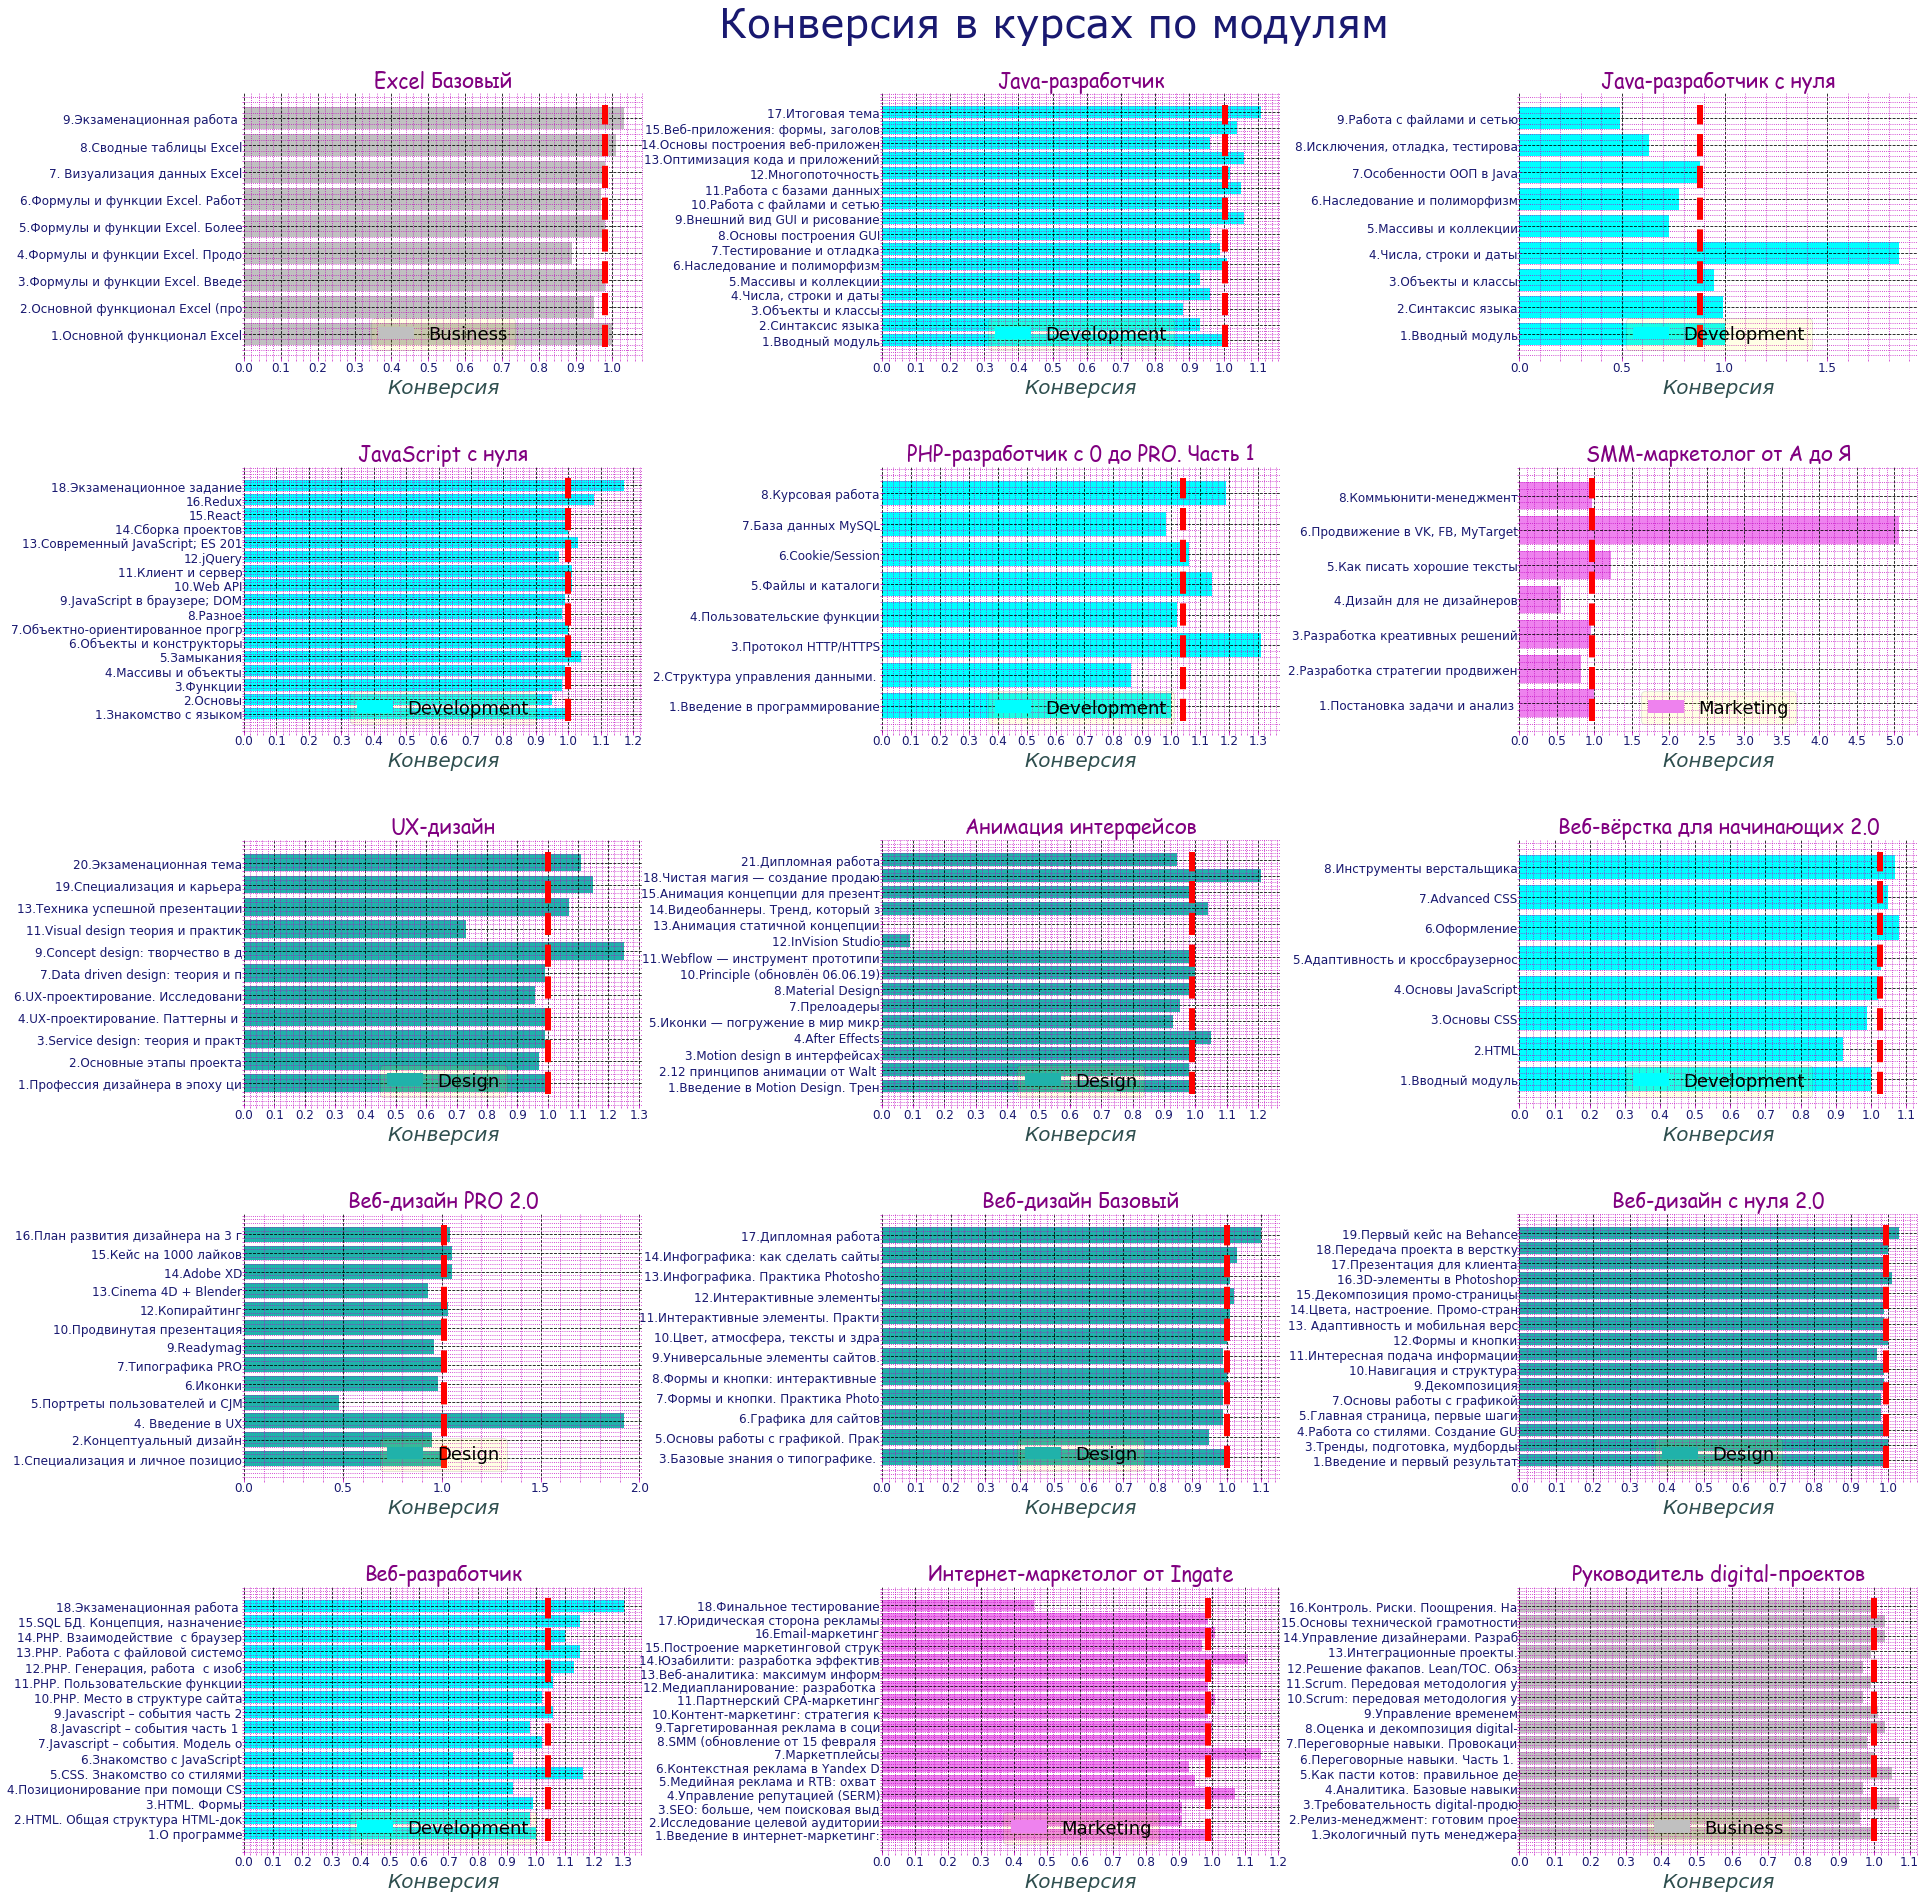

In [290]:
# Номер и название модулей
df_1_19 = df_1_17.groupby(['course_title', 'module_number','module_title']).agg('min')
list_tmodules_per_course = []
list_tmodules_per_all_course = []
for courses in sorted(list(set(df_1_19.groupby(['course_title', 'module_number','module_title']).
                               agg('min').index.get_level_values(0).tolist()))):
    for row in df_1_19.index:
        if row[0] == courses:
            ticks1 = row[1]
            ticks2 = row[2][:30]
            ticks = str(ticks1) + str('.') + str(ticks2)
            list_tmodules_per_course.append(ticks)
    list_tmodules_per_all_course.append(list_tmodules_per_course)
    list_tmodules_per_course=[]

fig, ax = plt.subplots(5, len(list(set(df_1_17['course_title'].tolist())))//5, figsize = (30, 30))
i = 0
fig.suptitle('Конверсия в курсах по модулям', fontsize=40, fontfamily = 'Verdana',
             fontstyle = 'normal', color = 'midnightblue')

scope = list(set(df_1_17['course_field'].tolist()))
colors = ['silver', 'violet', 'cyan', 'lightseagreen']

for row in range(0, 5):
    for column in range(0, len(list(set(df_1_17['course_title'].tolist())))//5):
        x = list_tmodules_per_all_course[i]

        #уберем нулевые значения конверсии, окрасим и зададим медиану
        if df_1_17.groupby(['course_title', 'course_field']).agg('min').index.get_level_values(1)[i] == scope[0]:
            y = list(filter(lambda num: num != 0, data.iloc[i].tolist()))
            ax[row,column].barh(x, y, color = colors[0], linewidth = 3, label = scope[0])
            ax[row,column].legend(loc='lower center')
            ax[row,column].vlines(median(y),-.5, len(y)-.5, color = 'r', linestyle = '--', linewidth = 6)
        elif df_1_17.groupby(['course_title', 'course_field']).agg('min').index.get_level_values(1)[i] == scope[1]:
            y = list(filter(lambda num: num != 0, data.iloc[i].tolist()))
            ax[row,column].barh(x, y, color = colors[1], linewidth = 3, label = scope[1])
            ax[row,column].legend(loc='lower center')
            ax[row,column].vlines(median(y),-.5, len(y)-.5, color = 'r', linestyle = '--', linewidth = 6)
        elif df_1_17.groupby(['course_title', 'course_field']).agg('min').index.get_level_values(1)[i] == scope[2]:
            y = list(filter(lambda num: num != 0, data.iloc[i].tolist()))
            ax[row,column].barh(x, y, color = colors[2], linewidth = 3, label = scope[2])
            ax[row,column].legend(loc='lower center')
            ax[row,column].vlines(median(y),-.5, len(y)-.5, color = 'r', linestyle = '--', linewidth = 6)
        elif df_1_17.groupby(['course_title', 'course_field']).agg('min').index.get_level_values(1)[i] == scope[3]:
            y = list(filter(lambda num: num != 0, data.iloc[i].tolist()))
            ax[row,column].barh(x, y, color = colors[3], linewidth = 3, label = scope[3])
            ax[row,column].legend(loc='lower center')
            ax[row,column].vlines(median(y),-.5, len(y)-.5, color = 'r', linestyle = '--', linewidth = 6)
        else:
            continue

        if max(y) > 1.5:  
            x_major = .5
        else:
            x_major = .1
        y_major = 2
        x_minor = x_major / 5
        ax[row, column].xaxis.set_major_locator(ticker.MultipleLocator(x_major))
        ax[row, column].xaxis.set_minor_locator(ticker.MultipleLocator(x_minor))
        ax[row, column].tick_params(axis = 'both', which = 'major', direction = 'inout', color = 'm',
               labelcolor = 'b', bottom = True, left = True, labelbottom = True, labelleft = True)
        ax[row, column].tick_params(axis = 'both', which = 'minor', direction = 'out', color = 'm',
               labelcolor = 'r', bottom = True, left = True)
        ax[row, column].set_xlabel('', fontsize = 20, color = 'darkslategrey', fontstyle = 'oblique')
        ax[row, column].set_ylabel('', fontsize = 20, color = 'darkslategrey', fontstyle = 'oblique')
        ax[row, column].grid(which='major', color = 'k', linestyle = '--')
        ax[row, column].minorticks_on()
        ax[row, column].grid(which='minor', color = 'm', linestyle = ':')
        
        ax[row,column].set_title(sorted(list(set(df_1_17['course_title'].tolist())))[i], fontfamily = 'fantasy', fontstyle = 'italic',
                color = 'purple', fontsize = 20,pad = 0)
        ax[row,column].tick_params(axis = 'both', which = 'major',
                                   labelsize = 12, pad = 0, labelcolor = 'midnightblue', labelrotation = 0)  
        i +=1
        sns.despine(left=True, bottom=True, right=True)

plt.setp(ax, xlabel = 'Конверсия')
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['legend.framealpha'] = .1
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.edgecolor'] = 'black'
plt.rcParams['legend.facecolor'] = 'yellow'
plt.subplots_adjust(wspace=.6, hspace=.4, top = .94)
plt.show()

### На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

На основании полученных метрик данного разделе можно констатировать следующее:
1. Наиболее значимое уменьшение конверсии можно наблюдать на последних этапах курсов Java-разработчик с нуля и Интернет-маркетолог от Ingate, а также в 11-ом модуле курса UX-дизайн, 12, 13 модулях курса Анимация интерфейсов, 5 модуле курса Веб-дизайн PRO 2.0
2. На курсе SMM-маркетолог от А до Я в 6-ом модуле выявлено аномальное увеличение конверсии, что может быть связано с популярностью изучаемого в данном модуле материала и необязательностью сдачи ДЗ по предыдущим темам (студенты "перескакивают" на это ДЗ, не закончив предыдущие), а также установлена явная непопулярность модуля "Дизайн для недизайнеров" по данному курсу, что тоже логично, т.к. курс для SEO-шников. Подобные аномалии зафиксированы в модуле 4 курса Java-разработчик с нуля и модуле 4 курса Веб-дизайн PRO 2.0
3. На протяжении всего времени обучения отслеживается стабильно-устойчивая конверсия в курсах Веб-дизайн Базовый, Веб-дизайн с нуля 2.0, Веб-верстка для начинающих 2.0, Excel Базовый, Руководитель digital-проектов, JavaScript с нуля.

## 5. Метрика успеваемости 

&nbsp;&nbsp;&nbsp;&nbsp;*(необязательное задание)*

Иногда студенты берут курсы, которые оказываются для них неподъемными. Это может быть как по причинам недостаточной изначальной подготовки, так и по причинам, связанным с низкой мотивацией студента. Для улучшения качества контента полезно выявить причину. На основании имеющихся данных придумайте метрику успеваемости студента. **Обоснуйте ее.** Выявите таких студентов на каждом курсе, чтобы предоставить продюсерам список проблемных студентов.

In [6]:
# Выявим студентов, которые не смогли правильно выполнить своё ПЕРВОЕ ДЗ (получили статус fail), 
# и у которых оставалось еще минимум 3 месяца в запасе для его исправления до окончания рассматриваемого периода,
# но так и не продолживших обучение.
import pytz
utc=pytz.UTC
check_date = pd.to_datetime('2019-04-01')
students_vs_1dz = []
students_vs_1dz_fail = []

df_1_20 = main[(main['is_homework'] == True)].copy()

df_1_21 = df_1_20.groupby(['student_id']).agg({'lesson_title' : 'count',
                                                        'course_title': lambda x:x.iloc[0],
                                                       'start_date' : lambda x:x.iloc[0]})
df_1_21 = df_1_21[df_1_21['lesson_title'] == 1]

df_1_21 = df_1_21[df_1_21['start_date'] < utc.localize(check_date)]
students_vs_1dz = df_1_21.index.get_level_values(0).tolist()

df_1_21 = df_1_20.loc[df_1_20['student_id'].isin(students_vs_1dz)]
df_1_21 = df_1_21[df_1_21['status'] == 'fail']

df_1_21 = df_1_21[['student_id','course_title','start_date', 'status']].sort_values('course_title')
df_1_21['start_date'] = (pd.to_datetime(df_1_21['start_date']).dt.strftime('%Y-%m-%d'))
students_vs_1dz_fail = df_1_21['student_id'].tolist()
df_1_21

student_id                   course_title  \
179913  bed2fcfbd96c21dba83f209872457695                  Excel Базовый   
179969  f47265f6d7cb9a1a7019a1f5a279e4f2                  Excel Базовый   
180118  4a7bbacc40504b09d1c2ae20e31e9fe4                  Excel Базовый   
180189  d2201d7380d71bede0107ecc9c52dca4                  Excel Базовый   
179786  8710e3acb02df79586bf217b24ae0a19                  Excel Базовый   
...                                  ...                            ...   
20024   3484ff013b7aaf0c13f7b285e23b114e  Интернет-маркетолог от Ingate   
19964   031dfc044197663e318abbfba02e4268  Интернет-маркетолог от Ingate   
19858   1100f0f3d341796bdc4bf0c69afab16f  Интернет-маркетолог от Ingate   
19784   8260b5592ad43117e5d357f2b50a7d60  Интернет-маркетолог от Ingate   
20232   3c6afeae3cbd896a3120658619fbfb28  Интернет-маркетолог от Ingate   

        start_date status  
179913  2018-03-16   fail  
179969  2018-09-07   fail  
180118  2019-03-01   fail  
180189  2019-03-28   fail  
179786  2019-02-06   fail  
...            ...    ...  
20024   2018-03-20   fail  
19964   2019-03-06   fail  
19858   2018-05-31   fail  
19784   2018-11-23   fail  
20232   2019-02-20   fail  

[117 rows x 4 columns]

ТОП-3 курсов с проблемными студентами:

In [7]:
df_1_22 = df_1_21.groupby(['course_title']).agg({'student_id' : 'count'}).sort_values('student_id', ascending = False).head(3)
df_1_22.columns = ['Число студентов']
df_1_22.index.names = ['Курс']
df_1_22

Число студентов
Курс                                          
Интернет-маркетолог от Ingate               34
Java-разработчик                            32
Веб-дизайн с нуля 2.0                       17

Обоснование метрики: недостаточная изначальная подготовка совокупно с низкой мотивацией студента с моей точки зрения в большинстве случаев проявляется после первой "неудачи" - неверно выполненного ДЗ. Впрочем, предложенный алгоритм решения легко масштабируется для поиска студентов, "опустивших руки" после любого n-го неверного ДЗ. Однако, с учетом невозможности сдачи последующего ДЗ без approve предыдущего осуществлять поиск демотивационных причин внутри успешно стартовавшего процесса обучения может быть излишним. Рассматривать причины неуспеваемости (нежелания учиться?) у не приступивших к обучению студентов избыточно в силу их вероятного соответствия социологической модели стандартного поведения и отсева новичков, в то время как оказать методологическую помощь сделавшим "первый шаг" желательно.